**CESAR SCHOOL**

**GRADUAÇÃO EM CIÊNCIA DA COMPUTAÇÃO**


---


Probabilidade e Estatística

Turma A - 2024.1

Alunos: Ana Beatriz Ximenes Alves e Caio Barreto de Albuquerque

**II Avaliação**

##**ORIENTAÇÕES E START**

* Para cada uma, justifique a importância da informação adquirida, e
discorra sobre a mesma, comparando, sempre que possível, com dados
obtidos através de uma pesquisa na literatura, citando a referência
utilizada.

* Explorações dos dados sem justificativa, irrelevantes e/ou sem discussão
apropriada, serão desconsideradas na avaliação da unidade.

* Identificada a cópia com relação a materiais de terceiros, TODA a
exploração será descartada.

* Calcular, por exemplo, apenas um histograma, um único mapa de calor,
etc em termos estatísticos não significa praticamente nada. Deverão ser
explorados todos os dados e mostrados tantos gráficos/distribuições
quanto forem necessários.

* Deverá ser enviado a atividade via classroom da disciplina com o link do
colab e uma documentação em anexo (pdf ou doc) com as devidas
justificativas dos cálculos e demais justitifativas nos moldes de um
relatório técnico.

* TODO O DATASET deverá ser analisado e não apenas uma parte do
mesmo. Poderá ser dado ênfase em alguma parte específica (caso seja
interessante para as análises). Porém a análise deverá ser completa e de
todo o dataset escolhido.

Link para os Datasets escolhidos:
* https://hdr.undp.org/sites/default/files/2023-24_HDR/HDR23-24_Statistical_Annex_HDI_Table.xlsx
* https://hdr.undp.org/sites/default/files/2023-24_HDR/HDR23-24_Statistical_Annex_HDI_Trends_Table.xlsx


**Importante ressaltar que foram unidos em um único dataset, disponível no link: https://drive.google.com/file/d/1GZDGzNfNKIRz3SE3IrMk3XPieZyqbSZ-/view?usp=share_link**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
hdi = pd.read_csv('/content/hdi-table-union.csv', encoding='latin1')

In [7]:
hdi.replace('..', np.nan, inplace=True)
hdi

HDI rank                   Country HDI 1990 HDI 2000 HDI 2010 HDI 2015  \
0           1               Switzerland      850      885      940      952   
1           2                    Norway      845      914      938      952   
2           3                   Iceland      834      895      927      948   
3           4    Hong Kong, China (SAR)      739      831      914      936   
4           5                   Denmark      839      890      913      936   
..        ...                       ...      ...      ...      ...      ...   
188       189                      Chad      NaN      292      364      388   
189       189                     Niger      212      260      336      367   
190       191  Central African Republic      333      319      357      367   
191       192               South Sudan      NaN      NaN      406      381   
192       193                   Somalia      NaN      NaN      NaN      NaN   

    HDI 2019 HDI 2020 HDI 2021  HDI 2022  ... AVG HDI GROWTH 2000-2010  \
0        960      957      965       967  ...                     0.60   
1        961      963      964       966  ...                     0.26   
2        958      955      957       959  ...                     0.35   
3        953      955      959       956  ...                     0.96   
4        946      946      947       952  ...                     0.26   
..       ...      ...      ...       ...  ...                      ...   
188      398      396      393       394  ...                     2.23   
189      390      391      389       394  ...                     2.60   
190      391      389      387       387  ...                     1.13   
191      391      386      381       381  ...                      NaN   
192      NaN      NaN      NaN       380  ...                      NaN   

    AVG HDI GROWTH 2010-2022 AVG HDI GROWTH 1990-2022  \
0                       0.24                     0.40   
1                       0.25                     0.42   
2                       0.28                     0.44   
3                       0.38                     0.81   
4                       0.35                     0.40   
..                       ...                      ...   
188                     0.66                      NaN   
189                     1.34                     1.96   
190                     0.67                     0.47   
191                    -0.53                      NaN   
192                      NaN                      NaN   

    Human Development Index (HDI) 2022 (SDG3) Life expectancy at birth 2022  \
0                                  967                                 84.3   
1                                  966                                 83.4   
2                                  959                                 82.8   
3                                  956                                 84.3   
4                                  952                                 81.9   
..                                 ...                                  ...   
188                                394                                 53.0   
189                                394                                 62.1   
190                                387                                 54.5   
191                                381                                 55.6   
192                                380                                 56.1   

     (SDG4.3) Expected years of schooling 2022  \
0                                         16.6   
1                                         18.6   
2                                         19.1   
3                                         17.8   
4                                         18.8   
..                                         ...   
188                                        8.2   
189                                        7.2   
190                                        7.3   
191                              

# Estatística Descritiva (1,0)

Nessa seção, você encontrará:
- Box plot
- Histrograma
- Scatter plot
- Mapa de calor para correlação (heatmap)

## Histograma Geral

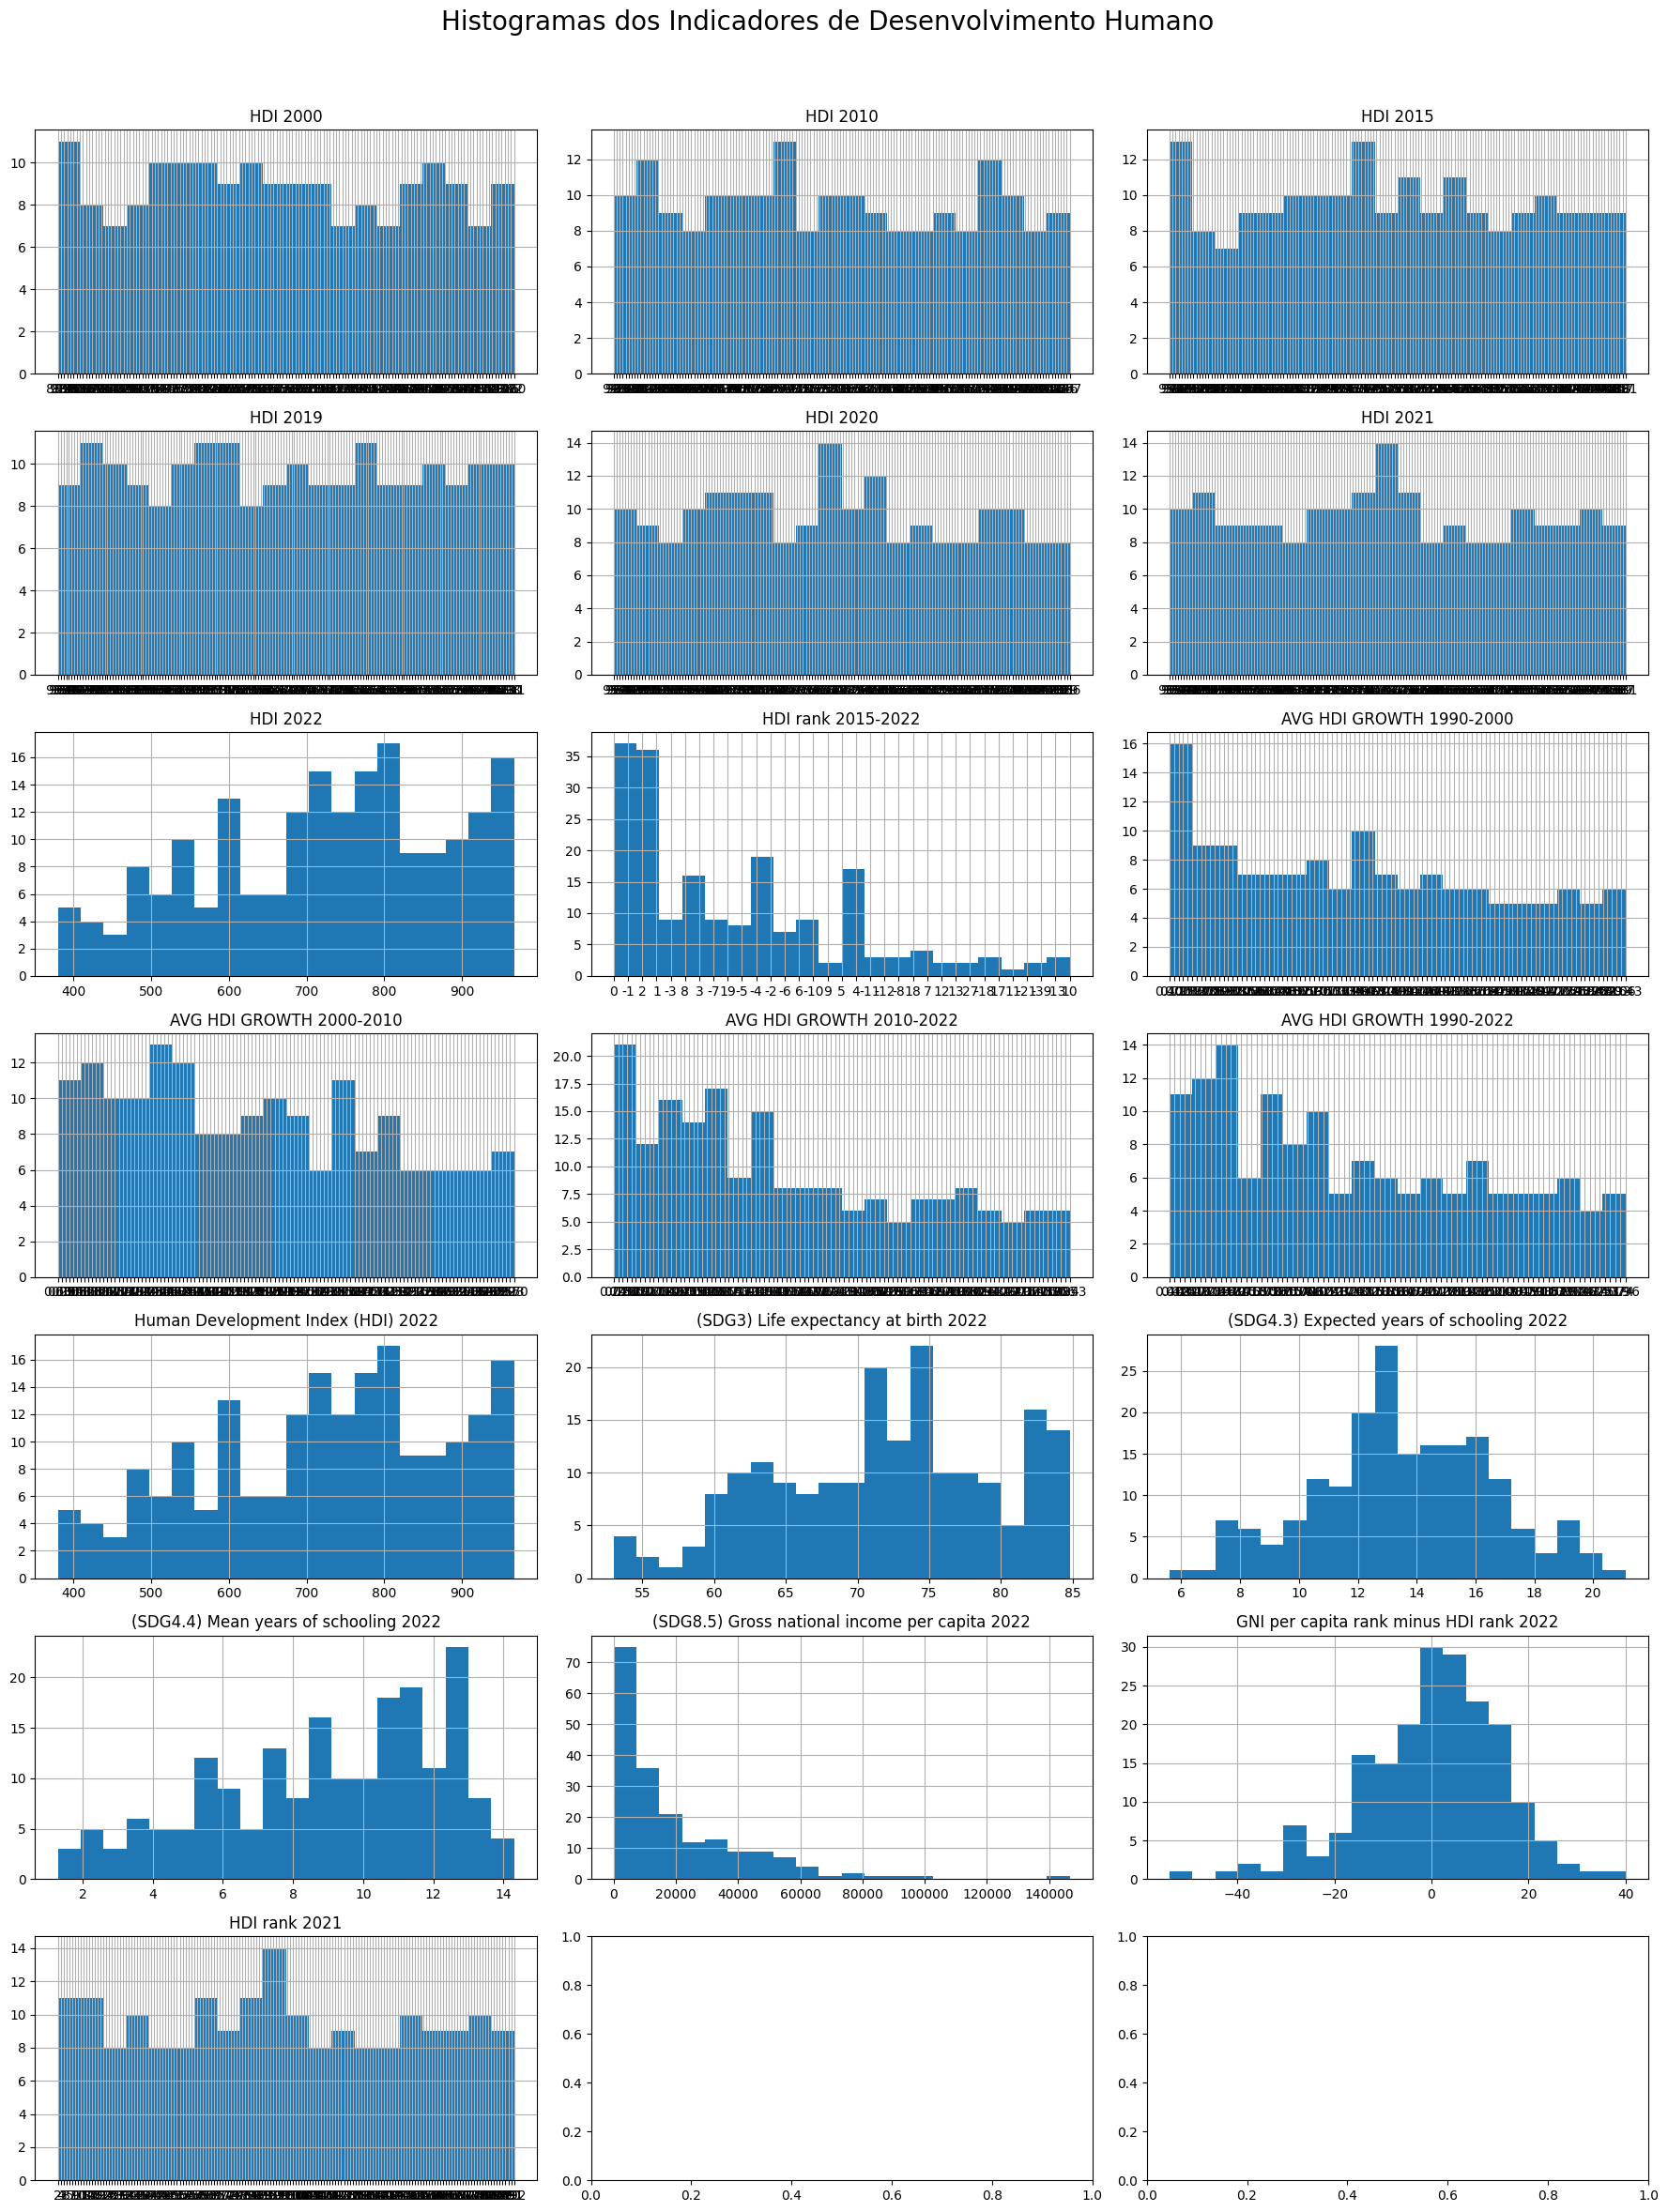

In [8]:
# Histograma Geral Inicial
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(18, 24))
fig.suptitle('Histogramas dos Indicadores de Desenvolvimento Humano', fontsize=20)

axes = axes.flatten()

for i, col in enumerate(hdi.columns[3:]):
    ax = axes[i]
    hdi[col].hist(bins=20, ax=ax)
    ax.set_title(col, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##Box Plots

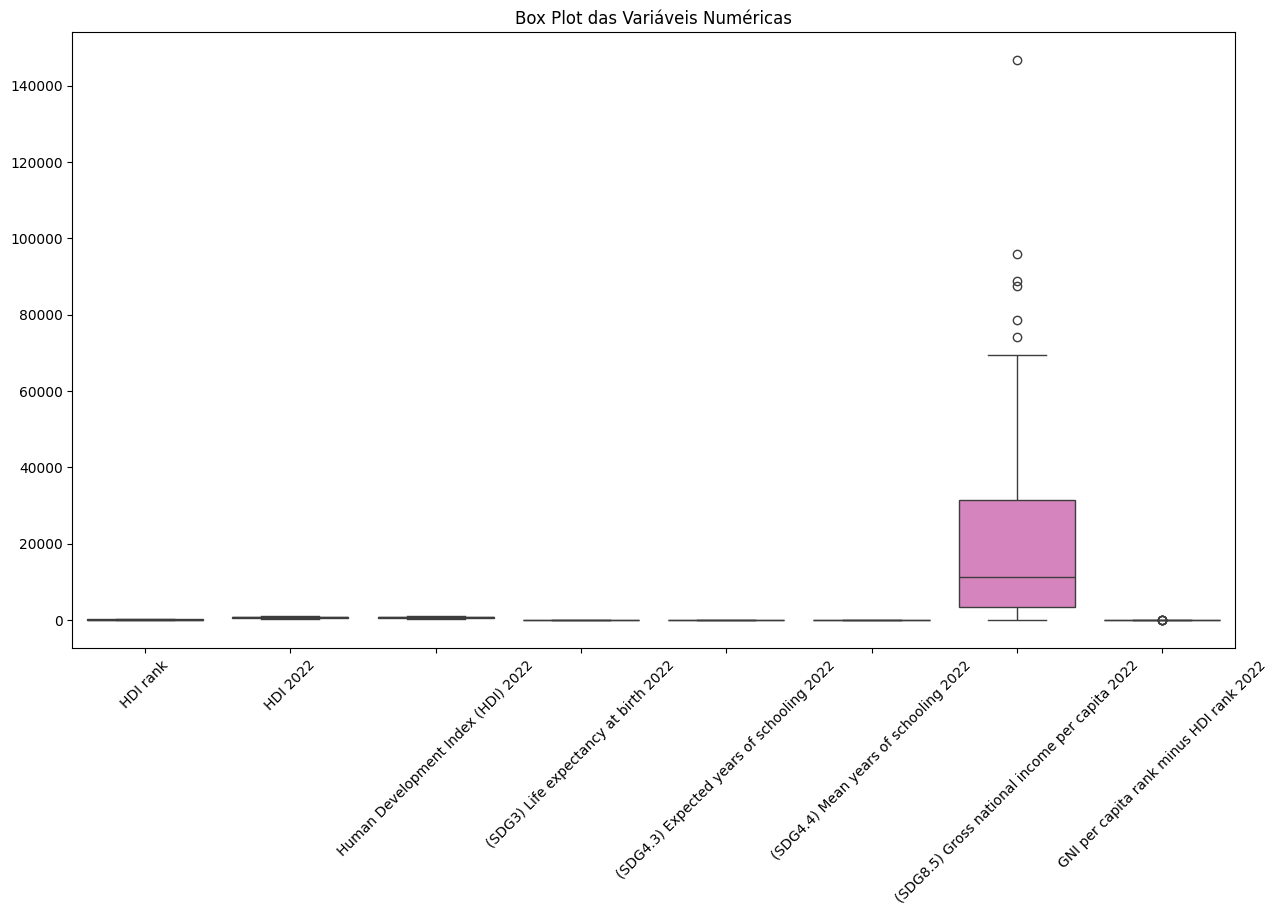

In [9]:
# Box plot para todas as colunas numéricas
plt.figure(figsize=(15, 8))
sns.boxplot(data=hdi.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plot das Variáveis Numéricas')
plt.xticks(rotation=45)
plt.show()

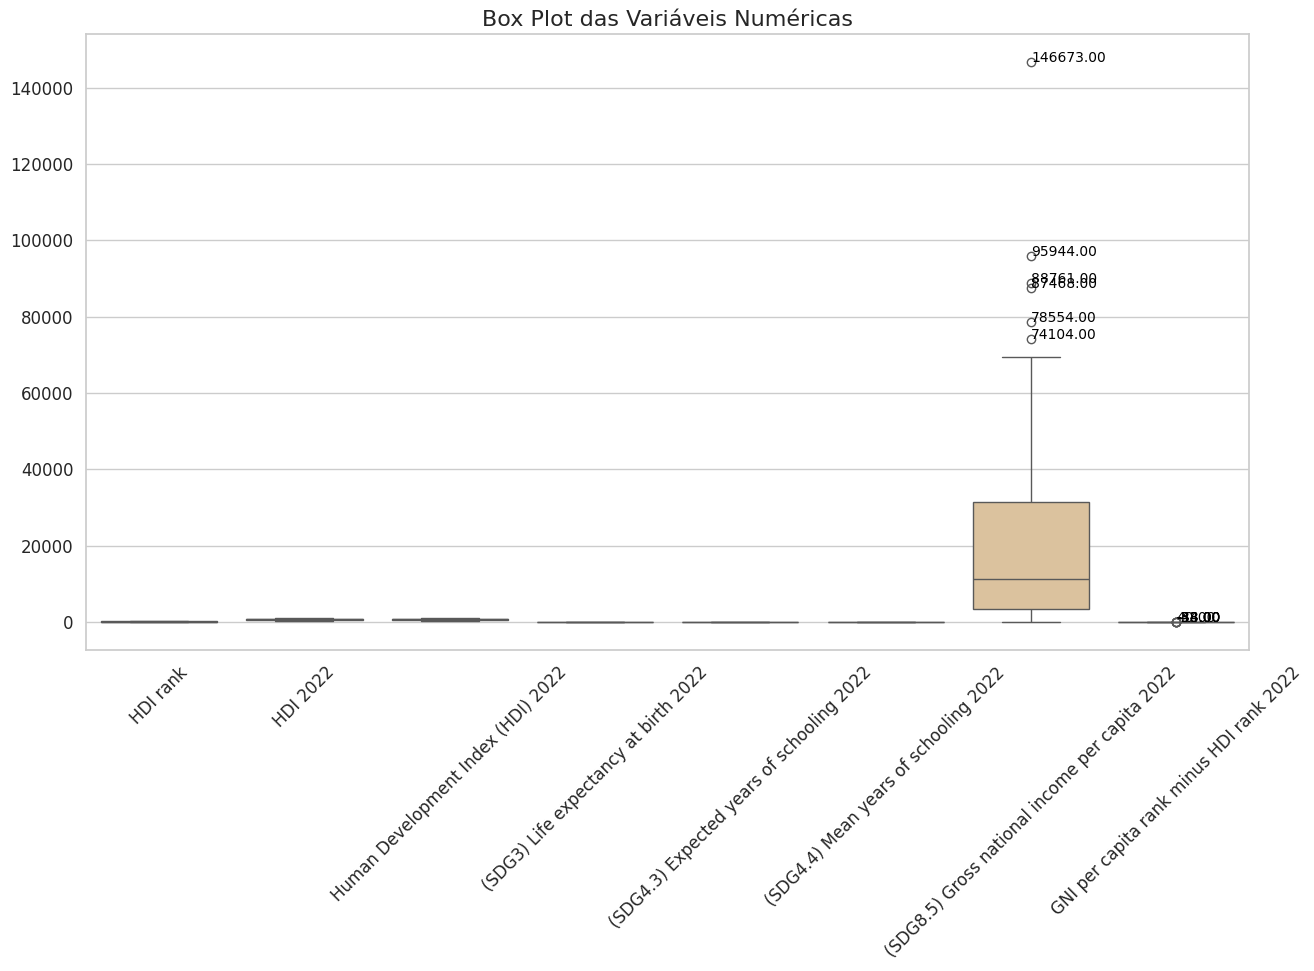

In [10]:
# Box Plot mais Detalhado

# Configurar estilo do gráfico
sns.set(style="whitegrid")

# Filtrar apenas colunas numéricas
numeric_columns = hdi.select_dtypes(include=['float64', 'int64'])

# Criar a figura
plt.figure(figsize=(15, 8))

# Criar o box plot com paleta de cores personalizada
box_plot = sns.boxplot(data=numeric_columns, palette="Set2")

# Adicionar título e ajustar rotação dos rótulos
plt.title('Box Plot das Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adicionar anotações para outliers
for i, col in enumerate(numeric_columns.columns):
    y = numeric_columns[col]
    Q1 = y.quantile(0.25)
    Q3 = y.quantile(0.75)
    IQR = Q3 - Q1
    outliers = y[(y > Q3 + 1.5 * IQR) | (y < Q1 - 1.5 * IQR)]
    for x in outliers.index:
        plt.text(i, y[x], f'{y[x]:.2f}', horizontalalignment='left', size='small', color='black')

plt.show()

## Histograma Específico

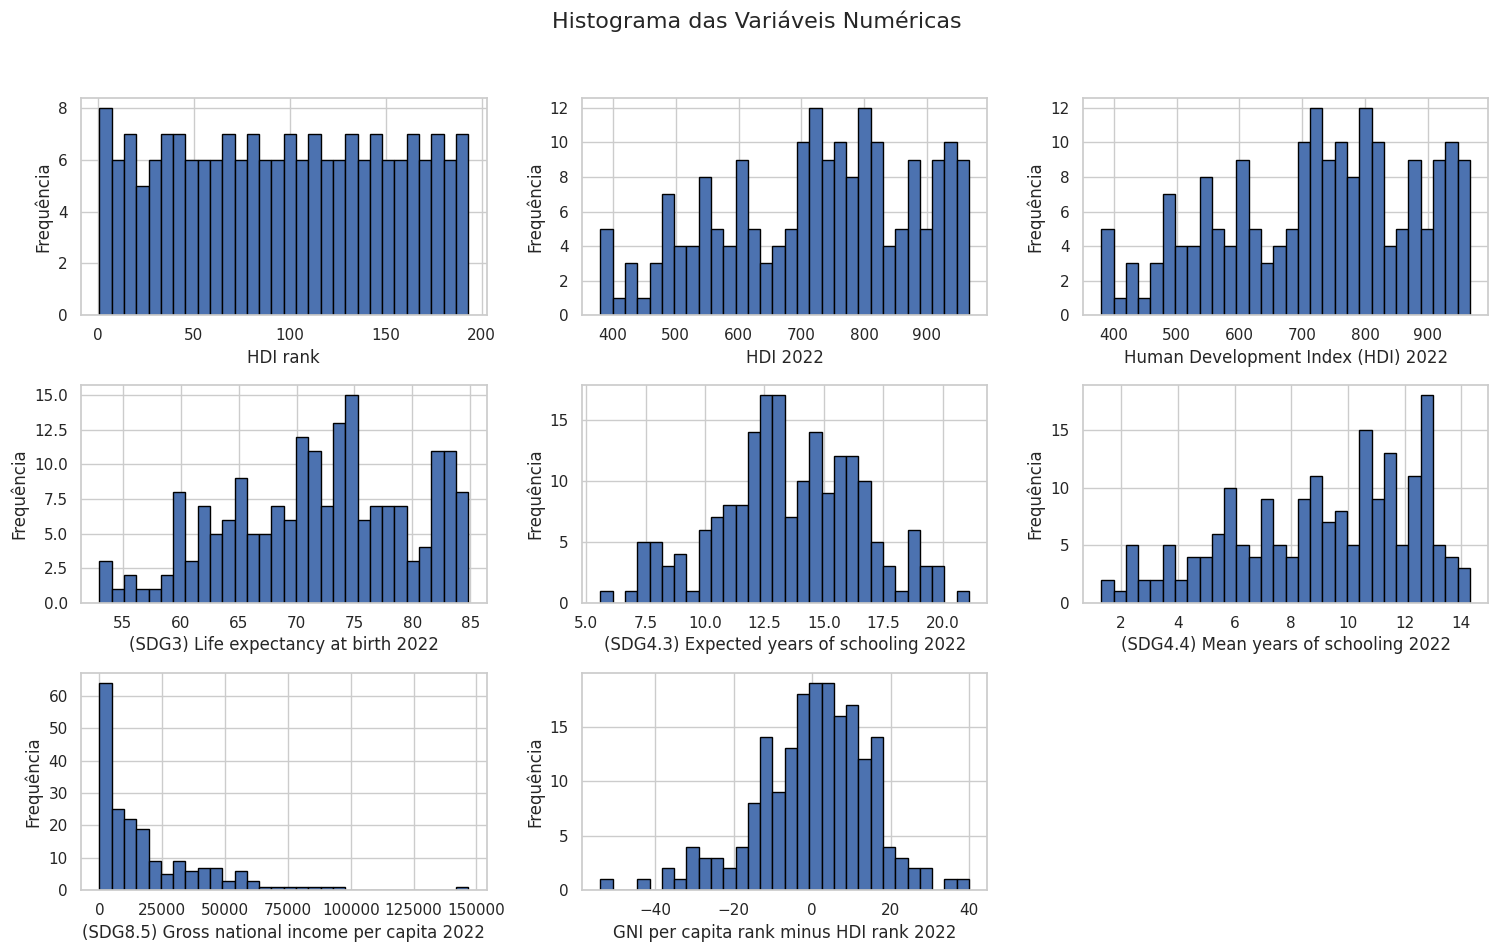

In [11]:
# Filtrar apenas as colunas numéricas
numeric_columns = hdi.select_dtypes(include=['float64', 'int64'])

# Criar histogramas para todas as colunas numéricas
numeric_columns.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograma das Variáveis Numéricas', fontsize=16)

# Adicionar títulos e rótulos aos eixos
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_title(), fontsize=12)
    ax.set_title('')
    ax.set_ylabel('Frequência', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para não sobrepor o título principal
plt.show()

## Mapa de Calor

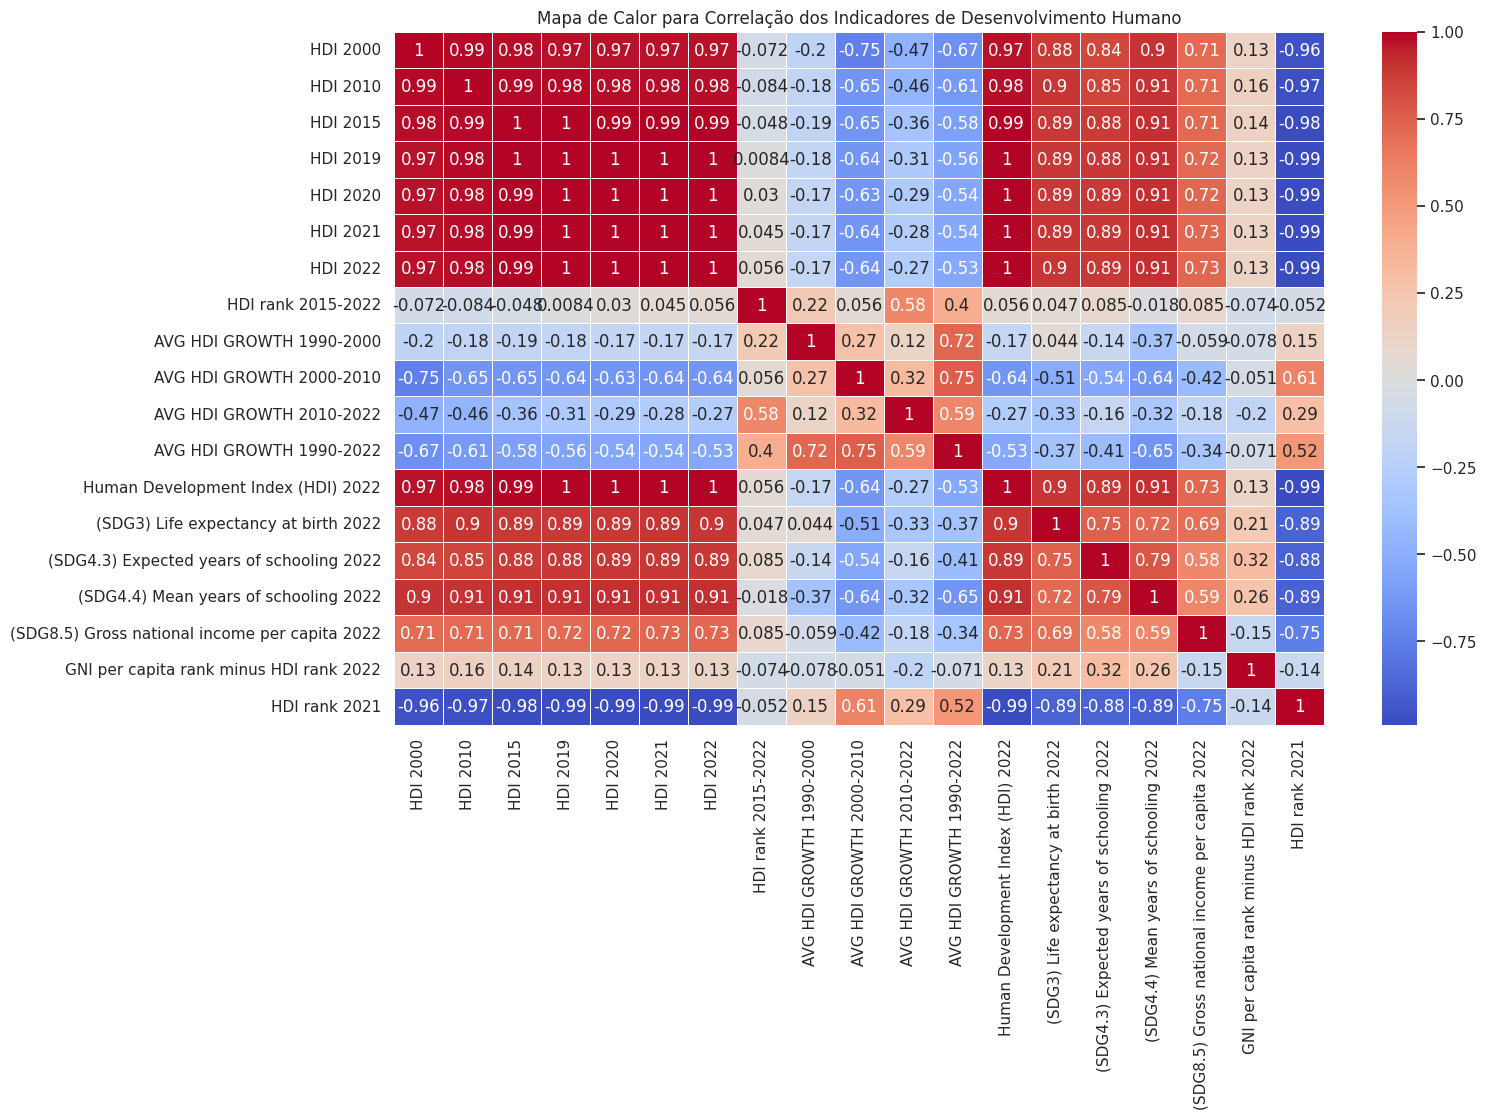

In [12]:
plt.figure(figsize=(15, 9))
corr = hdi.iloc[:, 3:].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor para Correlação dos Indicadores de Desenvolvimento Humano')
plt.show()

### Mapa de Calor Focalizado

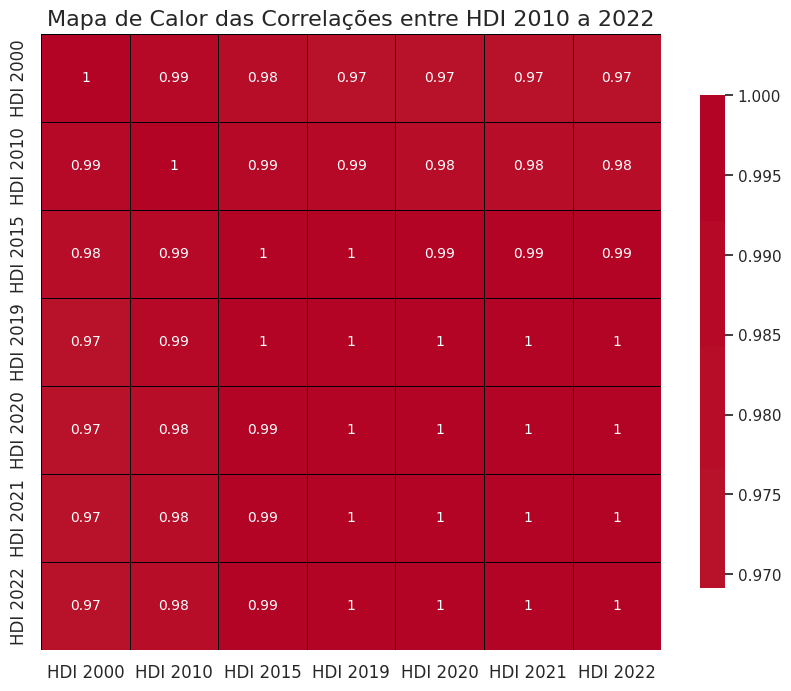

In [13]:
# Tentativa de Focalizar o Heatmap
# Selecionar as colunas de interesse para o heatmap
colunas_hdi = ['HDI 2000', 'HDI 2010', 'HDI 2015', 'HDI 2019', 'HDI 2020', 'HDI 2021', 'HDI 2022']

# Garantir que os valores são numéricos
hdi[colunas_hdi] = hdi[colunas_hdi].apply(pd.to_numeric, errors='coerce')

# Remover valores NaN
df_limpo = hdi[colunas_hdi].dropna()

# Heatmap para correlação entre as variáveis de HDI de 2010 a 2022
plt.figure(figsize=(10, 8))  # Ajuste o tamanho da figura para melhor visualização
corr_hdi = df_limpo.corr()
sns.heatmap(corr_hdi, annot=True, annot_kws={"size": 10}, cmap='coolwarm', center=0, cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='black')
plt.title('Mapa de Calor das Correlações entre HDI 2010 a 2022', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Scatter Plots

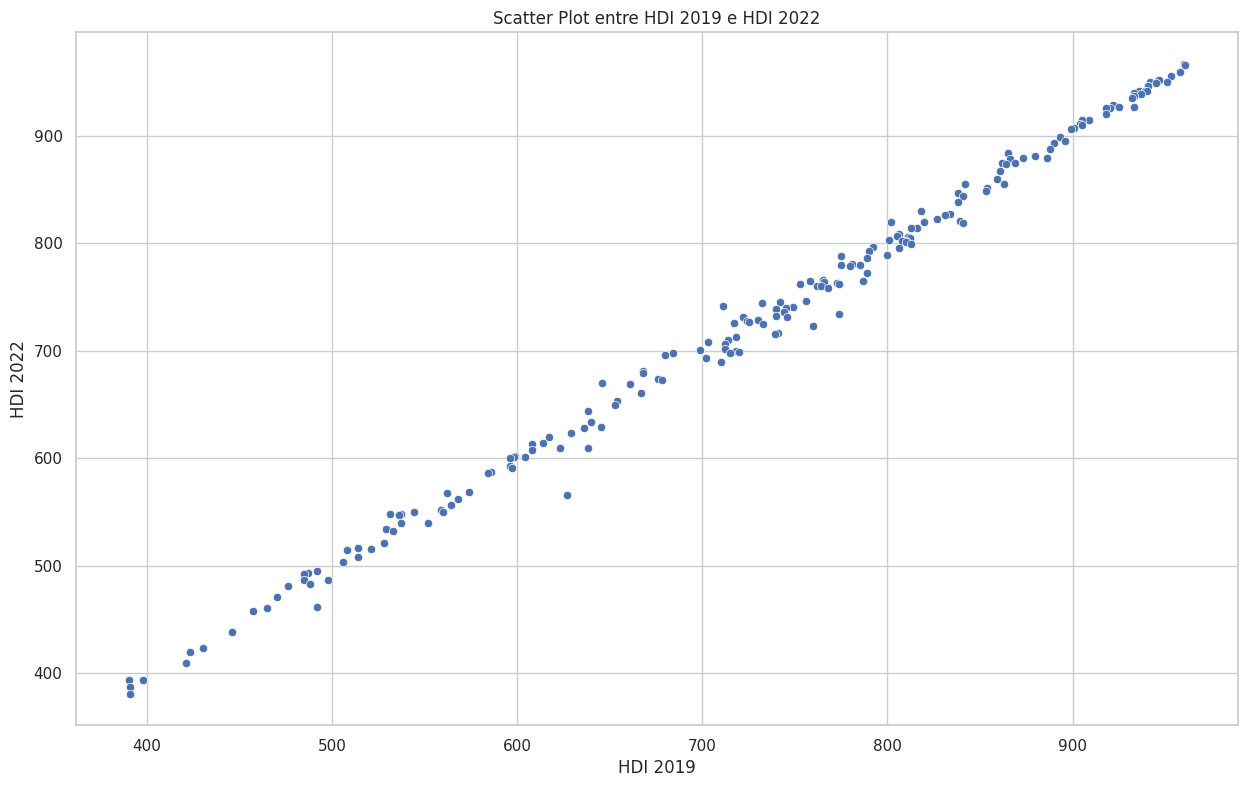

In [14]:
# Scatter plot entre duas variáveis de interesse
plt.figure(figsize=(15, 9))
sns.scatterplot(x='HDI 2019', y='HDI 2022', data=hdi)
plt.title('Scatter Plot entre HDI 2019 e HDI 2022')
plt.show()

In [15]:
# Filtra apenas as colunas numéricas para calcular a matriz de correlação
numeric_df = hdi.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Filtra as colunas com correlação maior que 0.75
high_corr_cols = corr_matrix[corr_matrix > 0.75]

# Remove a diagonal principal e as células não relevantes
high_corr_cols = high_corr_cols[high_corr_cols != 1].dropna(how='all').dropna(axis=1, how='all')

# Lista de pares de colunas com alta correlação
high_corr_pairs = [(row, col) for row in high_corr_cols.index for col in high_corr_cols.columns if row != col]

# Remover pares duplicados
high_corr_pairs = list(set([tuple(sorted(pair)) for pair in high_corr_pairs]))

# Cria scatterplots para cada par
num_plots = len(high_corr_pairs)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, (row, col) in enumerate(high_corr_pairs):
    sns.scatterplot(data=numeric_df, x=row, y=col, ax=axes[i])
    axes[i].set_title(f'Scatterplot: {row} vs {col}', fontsize=14)
    axes[i].set_xlabel(row, fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Remover os eixos não utilizados
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Normal Padrão (1,0)

Seguindo os exemplos de normalização realizados em aula, aplicamos a normalização no dataset.

## Normalização

In [16]:
from sklearn.preprocessing import StandardScaler

# Selecionando as colunas a serem normalizadas
colunas_para_normalizar = ['HDI 2019', 'HDI 2022']

# Aplicando a normalização
scaler = StandardScaler()
df_normalizado = hdi.copy()
df_normalizado[colunas_para_normalizar] = scaler.fit_transform(hdi[colunas_para_normalizar])

# Exibindo o dataframe normalizado
df_normalizado[colunas_para_normalizar].head()

HDI 2019  HDI 2022
0  1.542198  1.571697
1  1.548813  1.565236
2  1.528968  1.520009
3  1.495894  1.500626
4  1.449590  1.474782

### Representação Gráfica da Normalização

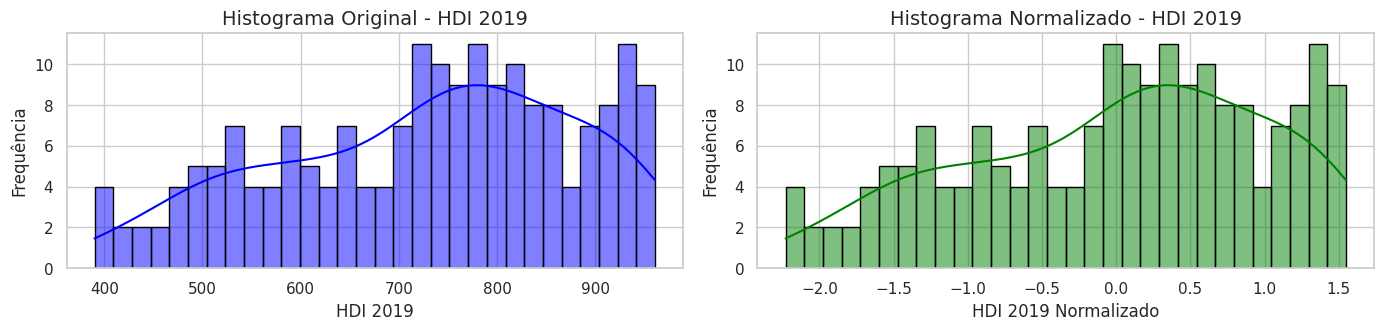

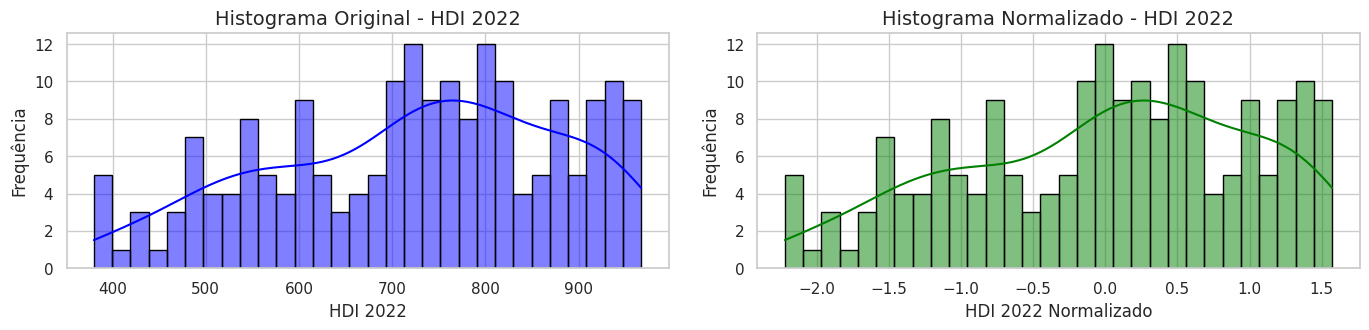

In [17]:
# Detalhando a normalização acima realizada

colunas_para_normalizar = ['HDI 2019', 'HDI 2022']

# Aplicando a normalização
scaler = StandardScaler()
df_normalizado = hdi.copy()
df_normalizado[colunas_para_normalizar] = scaler.fit_transform(hdi[colunas_para_normalizar])

# Comparando distribuições antes e depois da normalização
plt.figure(figsize=(14, 6))

# Histograma original 2019
plt.subplot(2, 2, 1)
sns.histplot(hdi['HDI 2019'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Histograma Original - HDI 2019', fontsize=14)
plt.xlabel('HDI 2019', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Histograma normalizado 2019
plt.subplot(2, 2, 2)
sns.histplot(df_normalizado['HDI 2019'], kde=True, bins=30, color='green', edgecolor='black')
plt.title('Histograma Normalizado - HDI 2019', fontsize=14)
plt.xlabel('HDI 2019 Normalizado', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

# Histograma original 2022
plt.subplot(2, 2, 1)
sns.histplot(hdi['HDI 2022'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Histograma Original - HDI 2022', fontsize=14)
plt.xlabel('HDI 2022', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Histograma normalizado 2022
plt.subplot(2, 2, 2)
sns.histplot(df_normalizado['HDI 2022'], kde=True, bins=30, color='green', edgecolor='black')
plt.title('Histograma Normalizado - HDI 2022', fontsize=14)
plt.xlabel('HDI 2022 Normalizado', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.tight_layout()
plt.show()

## Extra: Dados Matemáticos

In [18]:

# Ver dados matemáticos sobre as colunas de cada País
hdi['AVG HDI GROWTH 1990-2022'] = pd.to_numeric(hdi['AVG HDI GROWTH 1990-2022'], errors='coerce')
dados_limpos = hdi['AVG HDI GROWTH 1990-2022' ].dropna()


dados_limpos.groupby(hdi['Country']).describe()

count  mean  std   min   25%   50%   75%  \
Country                                                                        
Afghanistan                           1.0  1.53  NaN  1.53  1.53  1.53  1.53   
Albania                               1.0  0.61  NaN  0.61  0.61  0.61  0.61   
Algeria                               1.0  0.72  NaN  0.72  0.72  0.72  0.72   
Argentina                             1.0  0.50  NaN  0.50  0.50  0.50  0.50   
Armenia                               1.0  0.56  NaN  0.56  0.56  0.56  0.56   
...                                   ...   ...  ...   ...   ...   ...   ...   
Venezuela (Bolivarian Republic of)    1.0  0.19  NaN  0.19  0.19  0.19  0.19   
Viet Nam                              1.0  1.22  NaN  1.22  1.22  1.22  1.22   
Yemen                                 1.0  0.54  NaN  0.54  0.54  0.54  0.54   
Zambia                                1.0  0.98  NaN  0.98  0.98  0.98  0.98   
Zimbabwe                              1.0  0.43  NaN  0.43  0.43  0.43  0.43   

                                     max  
Country                                   
Afghanistan                         1.53  
Albania                             0.61  
Algeria                             0.72  
Argentina                           0.50  
Armenia                             0.56  
...                                  ...  
Venezuela (Bolivarian Republic of)  0.19  
Viet Nam                            1.22  
Yemen                               0.54  
Zambia                              0.98  
Zimbabwe                            0.43  

[143 rows x 8 columns]

# Distribuições Amostrais (1,0)

Criamos as distribuições amostrais das médias, variando o tamanho das amostras e apresentando gráficos mostrando a evolução da distribuição amostral da média à medida que o tamanho da amostra aumenta.

## Gráfico Geral

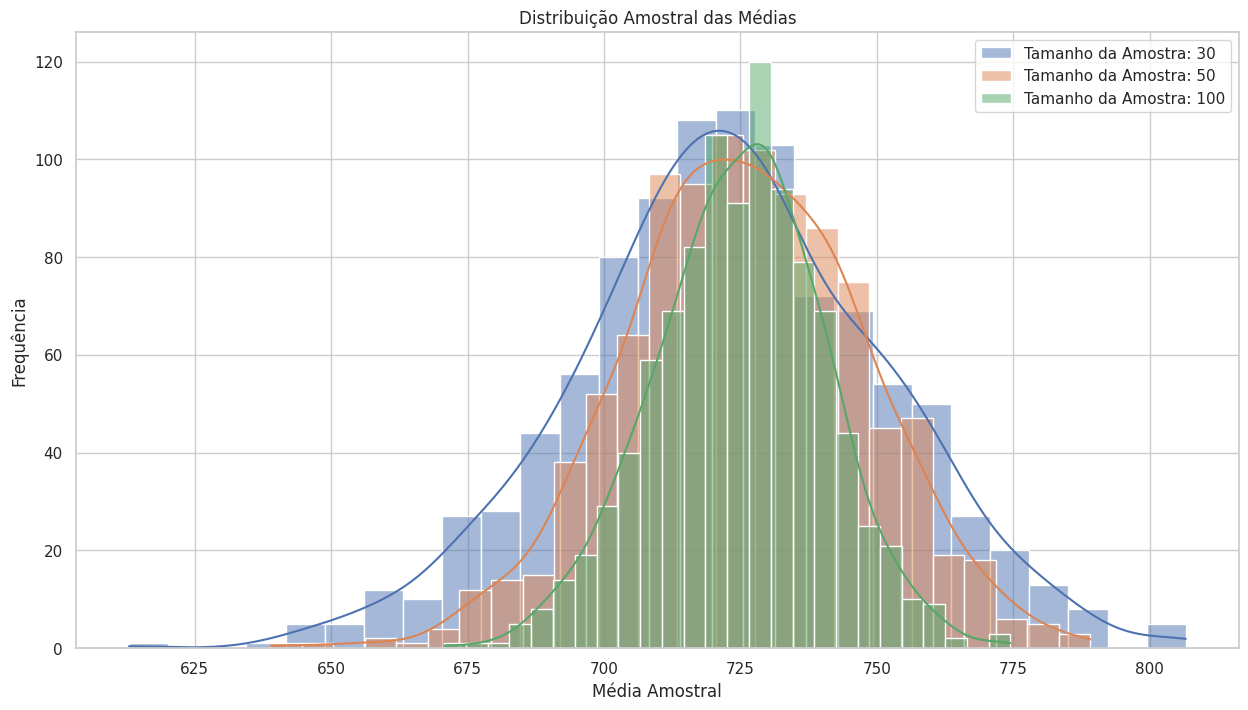

In [19]:
# Função para criar distribuições amostrais das médias
def amostras_media(data, tamanho_amostra, num_amostras):
    medias = []
    for _ in range(num_amostras):
        amostra = np.random.choice(data, tamanho_amostra, replace=True)
        medias.append(np.mean(amostra))
    return medias

# Variável de interesse para a distribuição amostral
variavel_interesse = 'HDI 2022'

# Criando distribuições amostrais para diferentes tamanhos de amostra
tamanhos_amostra = [30, 50, 100]
num_amostras = 1000

plt.figure(figsize=(15, 8))
for tamanho in tamanhos_amostra:
    medias = amostras_media(hdi[variavel_interesse].dropna(), tamanho, num_amostras)
    sns.histplot(medias, kde=True, label=f'Tamanho da Amostra: {tamanho}')

plt.title('Distribuição Amostral das Médias')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### Gráficos Individuais

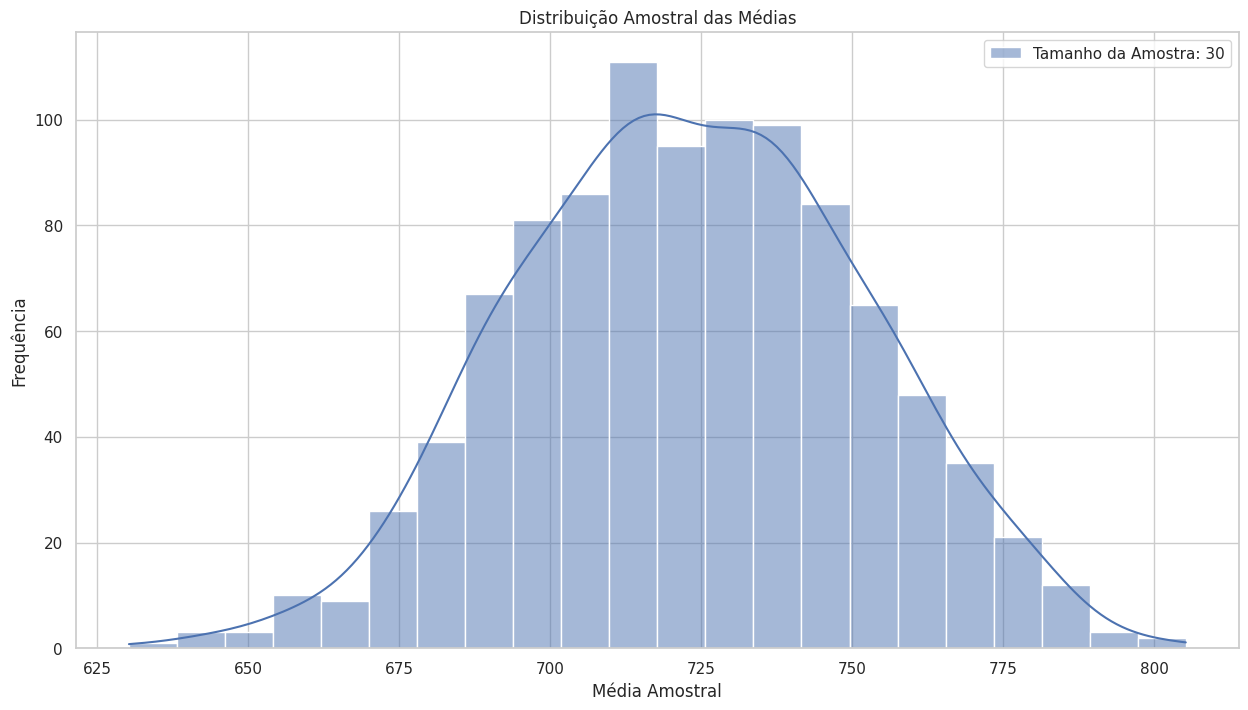

In [20]:
tamanhos_amostra = [30]
num_amostras = 1000

plt.figure(figsize=(15, 8))
for tamanho in tamanhos_amostra:
    medias = amostras_media(hdi[variavel_interesse].dropna(), tamanho, num_amostras)
    sns.histplot(medias, kde=True, label=f'Tamanho da Amostra: {tamanho}')

plt.title('Distribuição Amostral das Médias')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')
plt.legend()
plt.show()

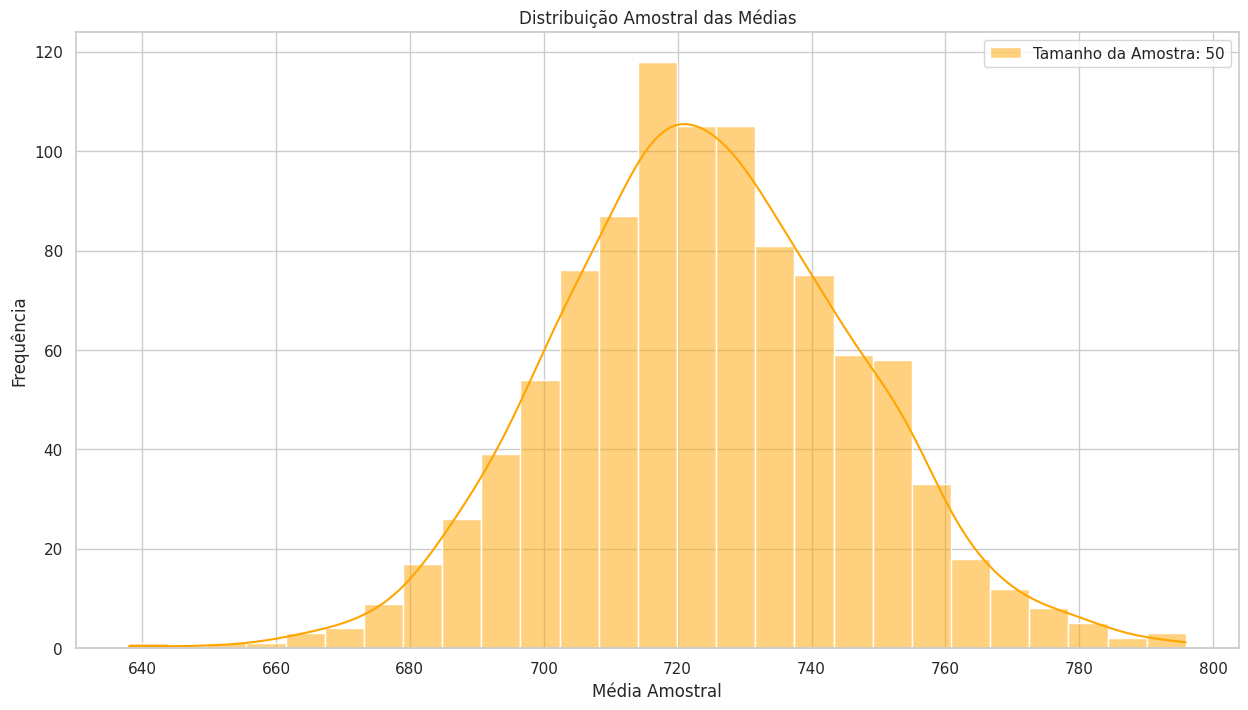

In [21]:
tamanhos_amostra = [50]
num_amostras = 1000

plt.figure(figsize=(15, 8))
for tamanho in tamanhos_amostra:
    medias = amostras_media(hdi[variavel_interesse].dropna(), tamanho, num_amostras)
    sns.histplot(medias, kde=True, color='orange' , label=f'Tamanho da Amostra: {tamanho}')

plt.title('Distribuição Amostral das Médias')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')
plt.legend()
plt.show()

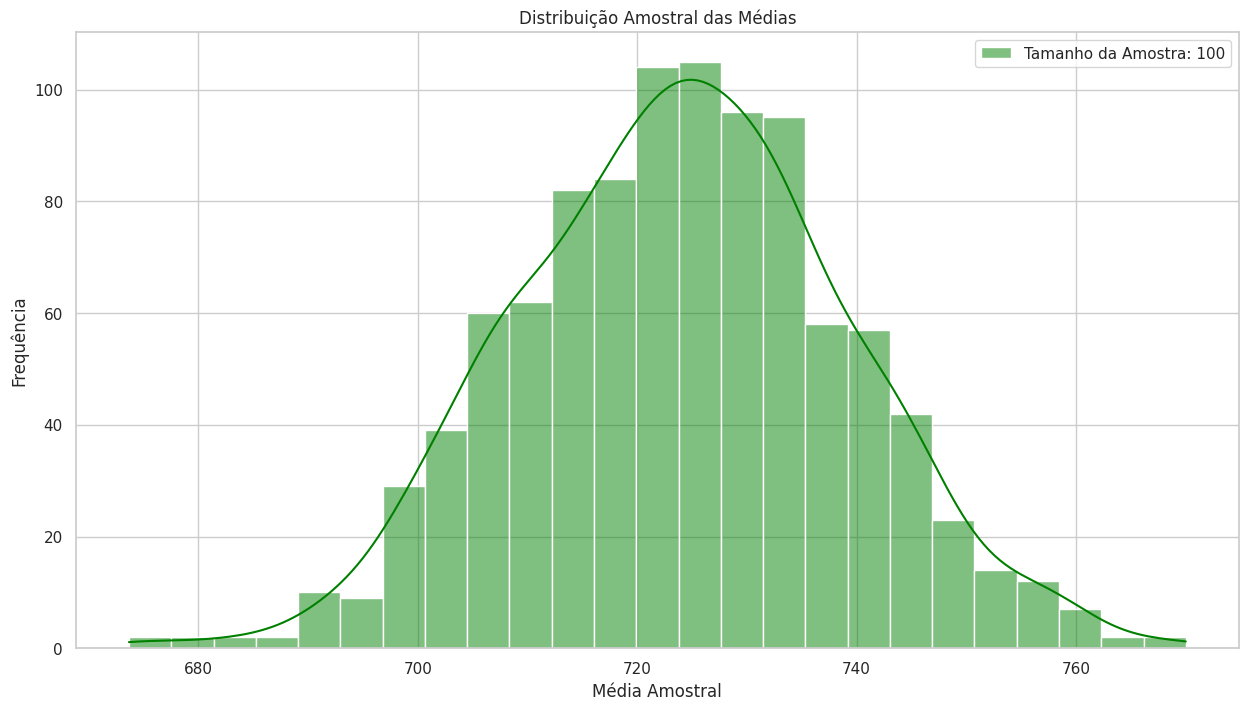

In [22]:
tamanhos_amostra = [100]
num_amostras = 1000

plt.figure(figsize=(15, 8))
for tamanho in tamanhos_amostra:
    medias = amostras_media(hdi[variavel_interesse].dropna(), tamanho, num_amostras)
    sns.histplot(medias, kde=True, color='green' , label=f'Tamanho da Amostra: {tamanho}')

plt.title('Distribuição Amostral das Médias')
plt.xlabel('Média Amostral')
plt.ylabel('Frequência')
plt.legend()
plt.show()

## Extra: Comparações Individuais entre Países

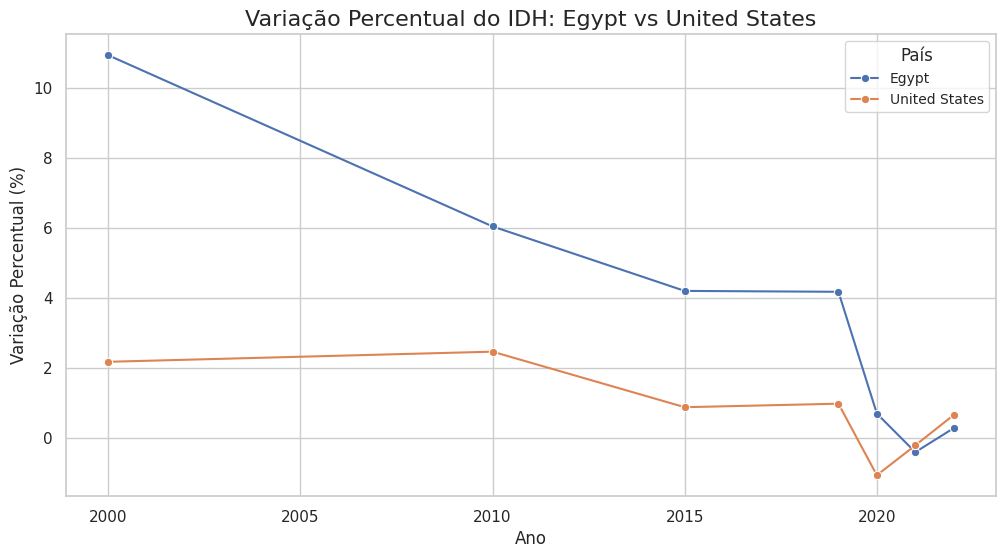

In [34]:
# Selecionar os países para comparação
country1 = 'Egypt'
country2 = 'United States'

# Selecionar colunas de interesse (anos)
years = ['HDI 1990', 'HDI 2000', 'HDI 2010', 'HDI 2015', 'HDI 2019', 'HDI 2020', 'HDI 2021', 'HDI 2022']

# Filtrar os dados dos dois países e selecionar as colunas de anos
hdi_country1 = hdi[hdi['Country'] == country1][years].T
hdi_country2 = hdi[hdi['Country'] == country2][years].T

# Converter os valores para numéricos, forçando erros para NaN
hdi_country1 = hdi_country1.apply(pd.to_numeric, errors='coerce')
hdi_country2 = hdi_country2.apply(pd.to_numeric, errors='coerce')

# Renomear colunas para os nomes dos países
hdi_country1.columns = [country1]
hdi_country2.columns = [country2]

# Ajustar o índice para os anos (transformando o DataFrame de uma coluna em uma Série)
hdi_country1.index = hdi_country1.index.str.extract(r'(\d{4})')[0].astype(int)
hdi_country2.index = hdi_country2.index.str.extract(r'(\d{4})')[0].astype(int)

# Calcular a variação percentual ano a ano para cada país
hdi_country1_pct_change = hdi_country1.pct_change().dropna() * 100
hdi_country2_pct_change = hdi_country2.pct_change().dropna() * 100

# Combinar os dados em um único DataFrame
hdi_pct_change_comparison = pd.concat([hdi_country1_pct_change, hdi_country2_pct_change], axis=1)
hdi_pct_change_comparison.index.name = 'Year'
hdi_pct_change_comparison.reset_index(inplace=True)

# Reformatar os dados para o formato longo (long format) para facilitar a plotagem
hdi_long_pct_change = pd.melt(hdi_pct_change_comparison, id_vars=['Year'], value_vars=[country1, country2],
                              var_name='Country', value_name='PctChange')

# Criar o gráfico de linhas comparativas de mudanças percentuais
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='PctChange', hue='Country', data=hdi_long_pct_change, marker='o')
plt.title(f'Variação Percentual do IDH: {country1} vs {country2}', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Variação Percentual (%)', fontsize=12)
plt.legend(title='País', fontsize='small')
plt.grid(True)
plt.show()

# Intervalo de Confiança (0,5)

## Geral, com variável aleatória

In [24]:
from scipy import stats

# Garantir que os valores são numéricos
hdi[variavel_interesse] = pd.to_numeric(hdi[variavel_interesse], errors='coerce')

# Remover valores NaN
dados_limpos = hdi[variavel_interesse].dropna()

# Calculando intervalo de confiança
media = np.mean(dados_limpos)
sem = stats.sem(dados_limpos)  # Erro padrão da média
ic_85 = stats.t.interval(0.85, len(dados_limpos)-1, loc=media, scale=sem)
ic_90 = stats.t.interval(0.90, len(dados_limpos)-1, loc=media, scale=sem)
ic_95 = stats.t.interval(0.95, len(dados_limpos)-1, loc=media, scale=sem)

print(f'Intervalo de Confiança de 85%: {ic_85}')
print(f'Intervalo de Confiança de 90%: {ic_90}')
print(f'Intervalo de Confiança de 95%: {ic_95}')

Intervalo de Confiança de 85%: (707.5969149767831, 739.8849503081909)
Intervalo de Confiança de 90%: (705.2789916599077, 742.2028736250663)
Intervalo de Confiança de 95%: (701.7094480388959, 745.7724172460781)


## Para cada coluna, selecionando uma variável aleatoria

### Cálculos

In [25]:
# Filtrar apenas as colunas numéricas
numeric_columns = hdi.select_dtypes(include=['float64', 'int64'])

# Calcular os intervalos de confiança para cada coluna numérica
for column in numeric_columns.columns:
    # Garantir que os valores são numéricos
    hdi[column] = pd.to_numeric(hdi[column], errors='coerce')

    # Remover valores NaN
    dados_limpos = hdi[column].dropna()

    # Calculando média e erro padrão da média
    media = np.mean(dados_limpos)
    sem = stats.sem(dados_limpos)  # Erro padrão da média

    # Calculando intervalos de confiança
    ic_85 = stats.t.interval(0.85, len(dados_limpos)-1, loc=media, scale=sem)
    ic_90 = stats.t.interval(0.90, len(dados_limpos)-1, loc=media, scale=sem)
    ic_95 = stats.t.interval(0.95, len(dados_limpos)-1, loc=media, scale=sem)

    print(f'\nVariável: {column}')
    print(f'Média: {media:.4f}')
    print(f'Erro padrão da média: {sem:.4f}')
    print(f'Intervalo de Confiança de 85%: {ic_85}')
    print(f'Intervalo de Confiança de 90%: {ic_90}')
    print(f'Intervalo de Confiança de 95%: {ic_95}')



Variável: HDI rank
Média: 96.8549
Erro padrão da média: 4.0246
Intervalo de Confiança de 85%: (91.03809924675784, 102.67174531282765)
Intervalo de Confiança de 90%: (90.20293231262765, 103.50691224695784)
Intervalo de Confiança de 95%: (88.91679623534664, 104.79304832423885)

Variável: HDI 2000
Média: 635.9489
Erro padrão da média: 12.8954
Intervalo de Confiança de 85%: (617.3036599478208, 654.5940673249064)
Intervalo de Confiança de 90%: (614.6248984204535, 657.2728288522737)
Intervalo de Confiança de 95%: (610.4982986808315, 661.3994285918958)

Variável: HDI 2010
Média: 690.0838
Erro padrão da média: 11.4880
Intervalo de Confiança de 85%: (673.4792965590001, 706.6882427080157)
Intervalo de Confiança de 90%: (671.0950958149006, 709.0724434521151)
Intervalo de Confiança de 95%: (667.423354111839, 712.7441851551766)

Variável: HDI 2015
Média: 712.5260
Erro padrão da média: 11.0751
Intervalo de Confiança de 85%: (696.5187027364148, 728.5333805969185)
Intervalo de Confiança de 90%: (694.

### Representações Gráficas

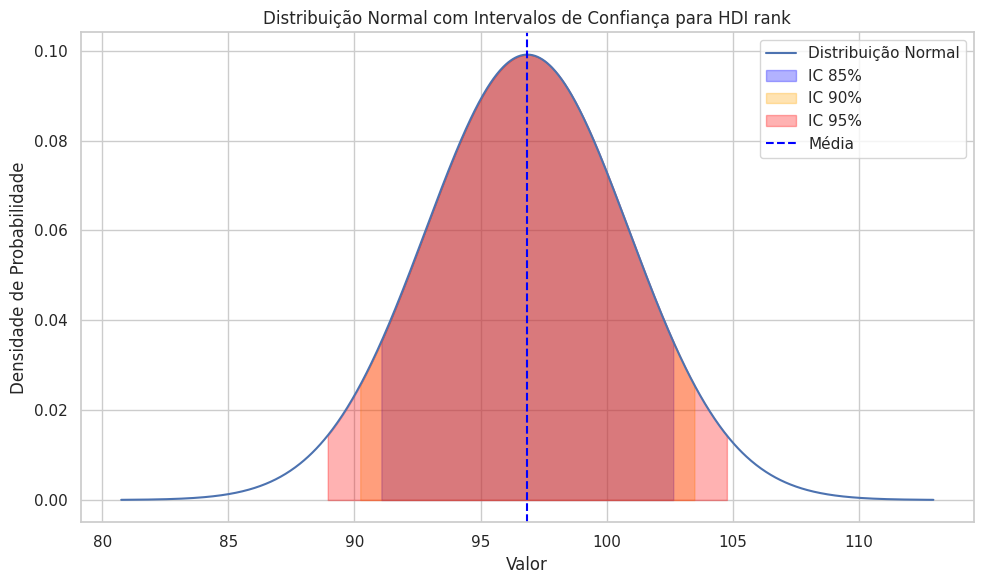

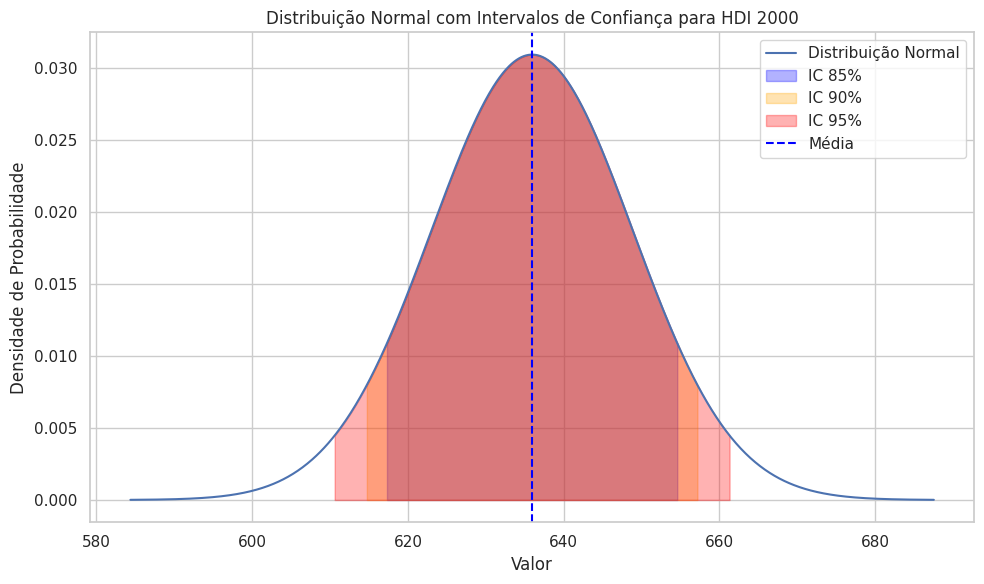

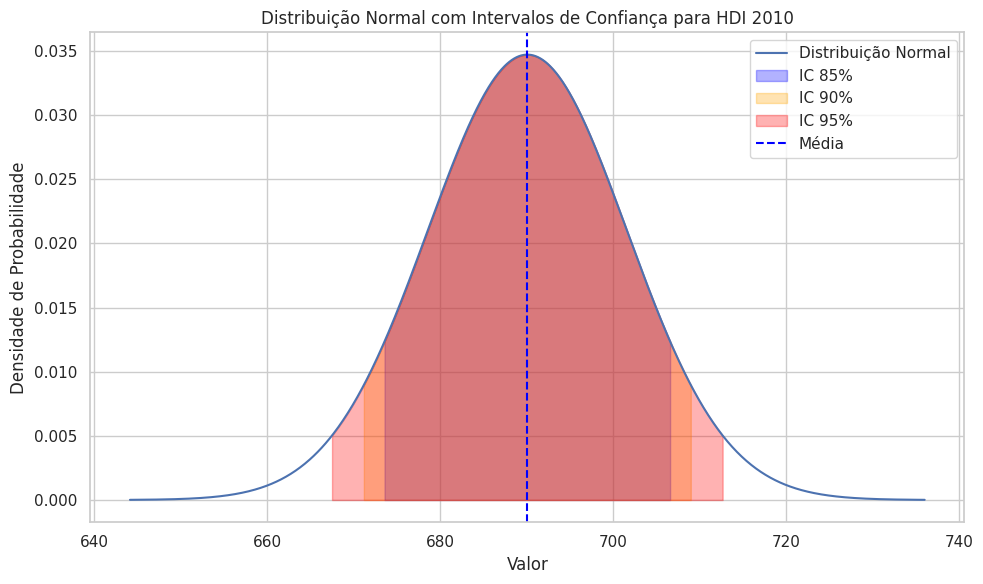

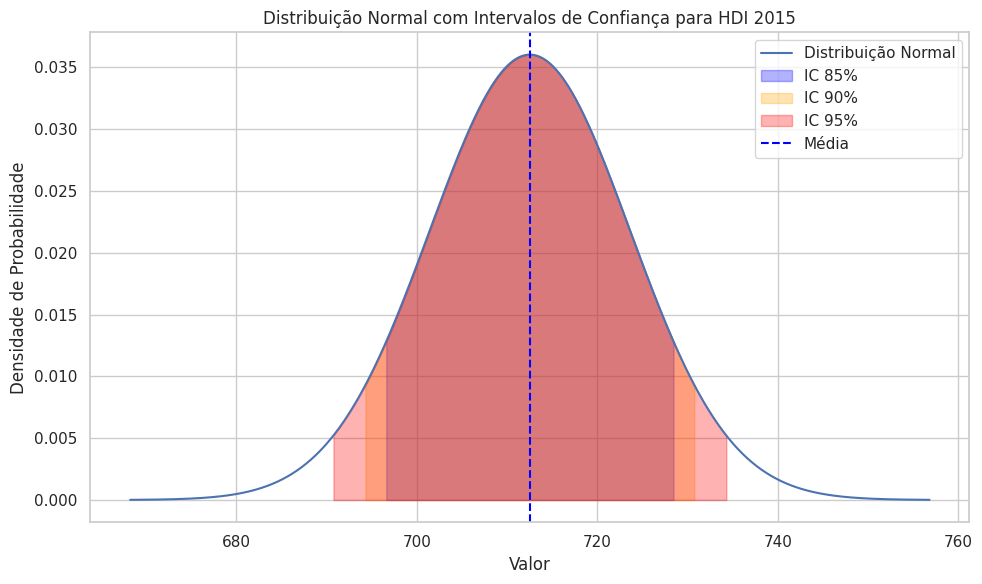

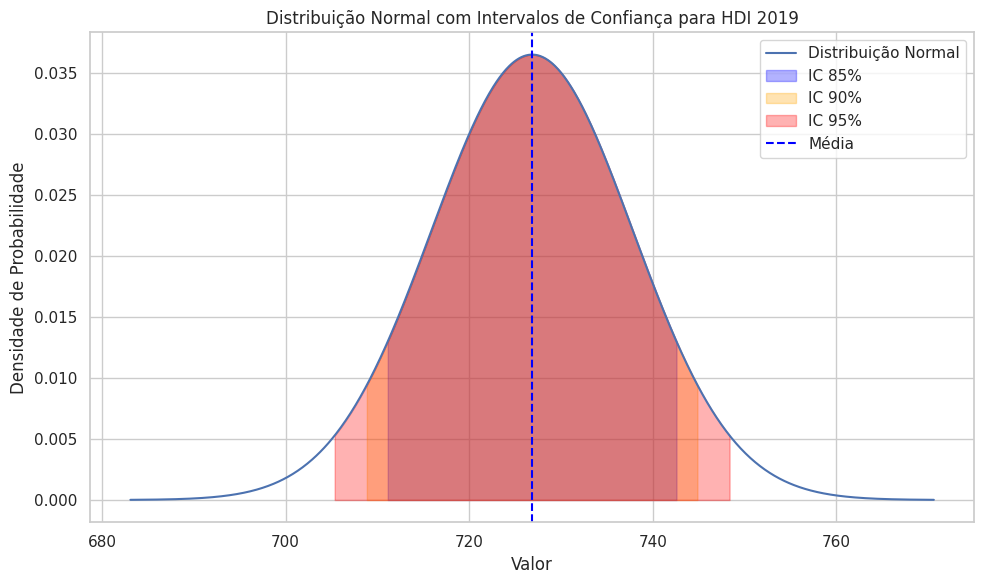

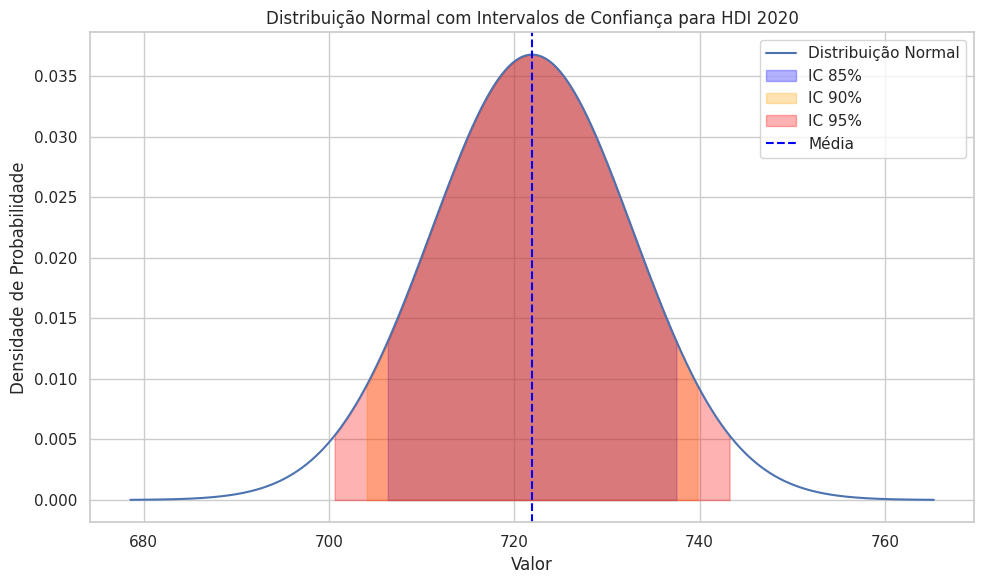

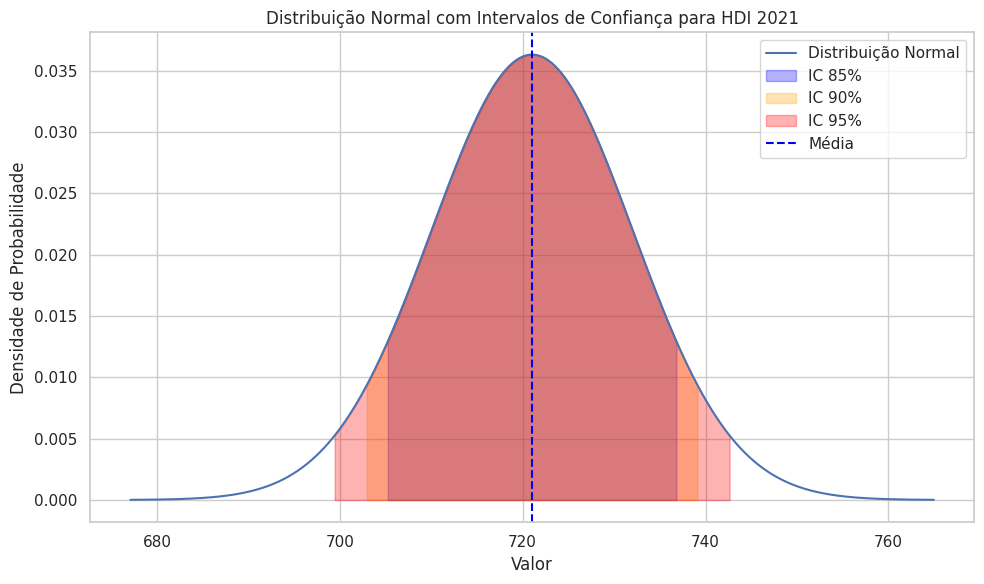

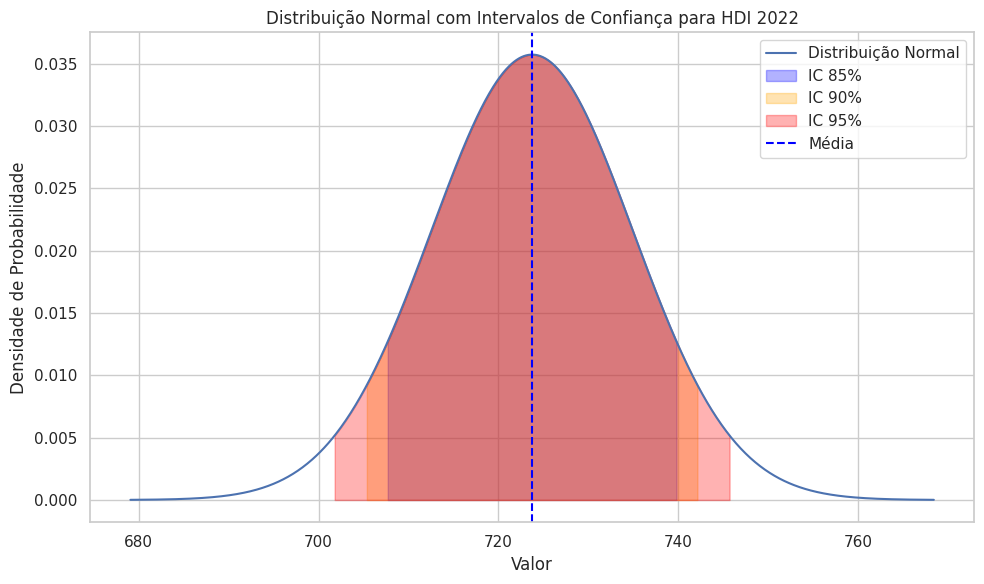

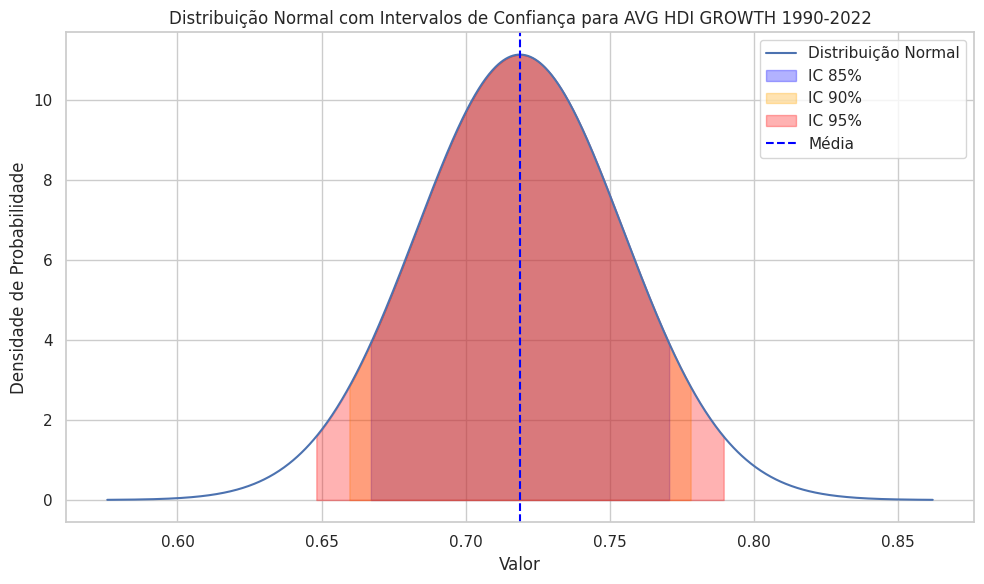

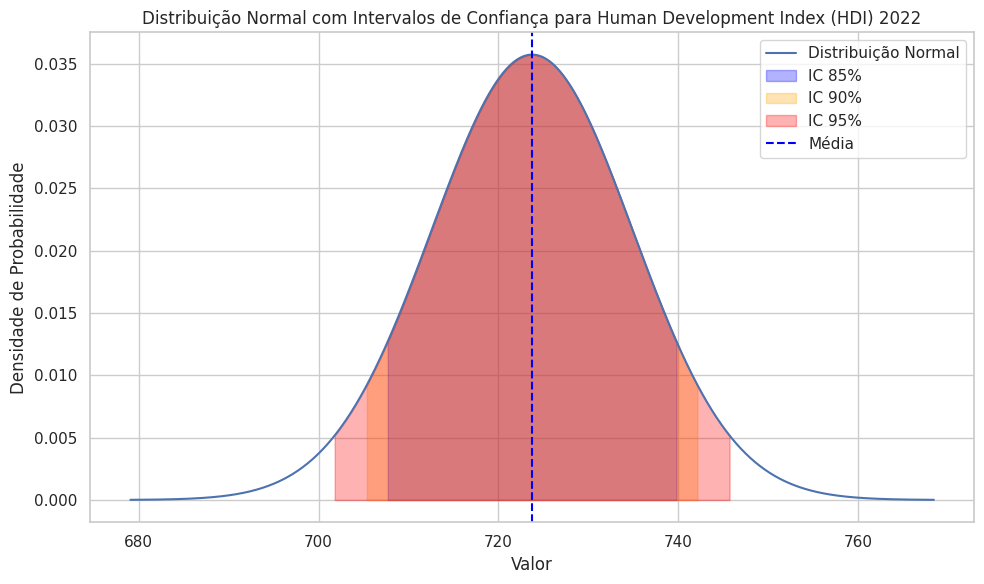

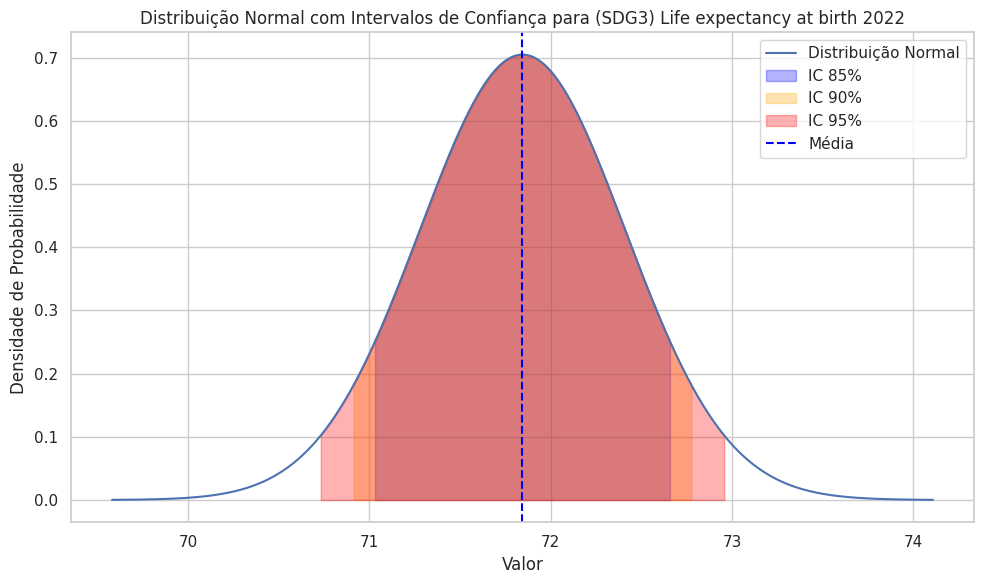

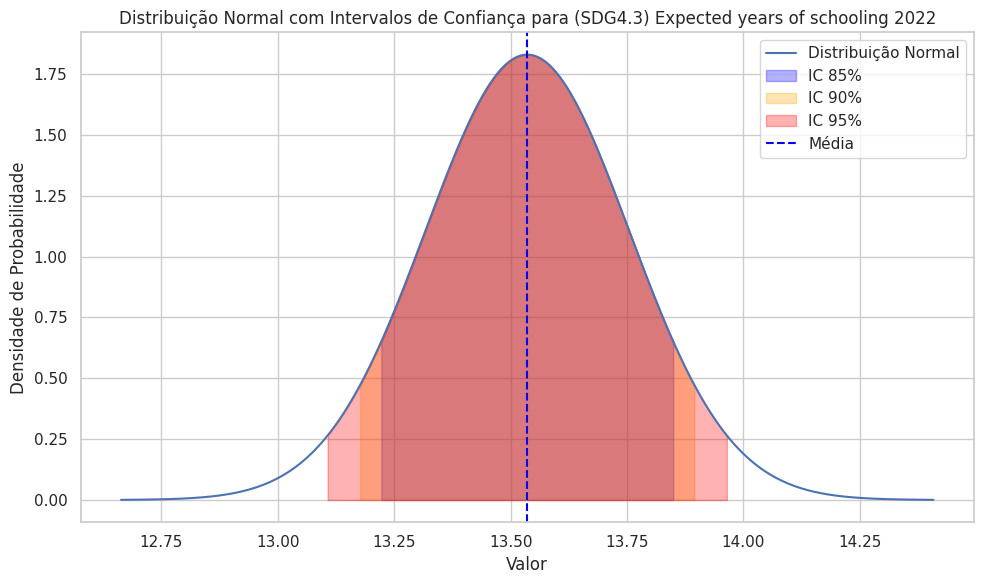

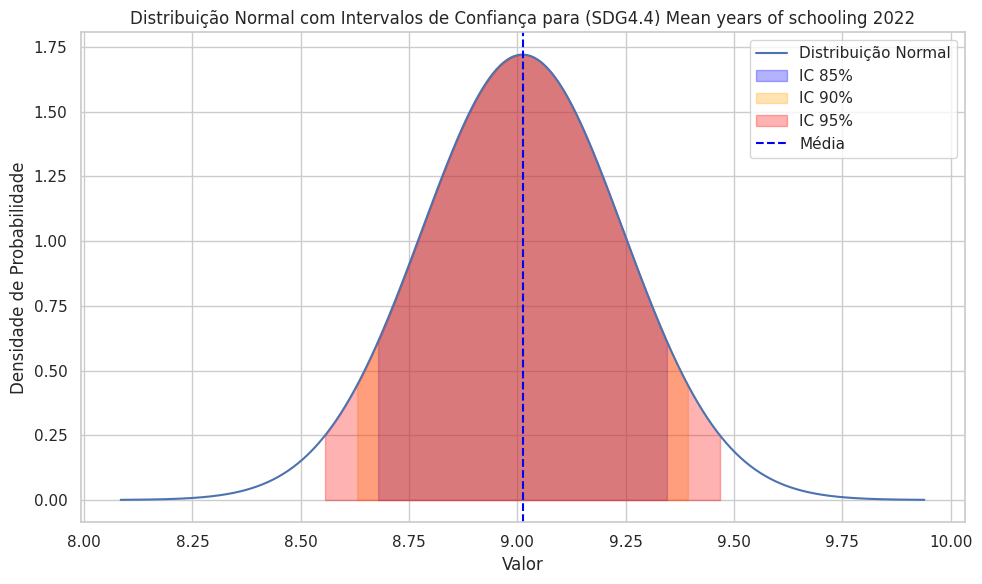

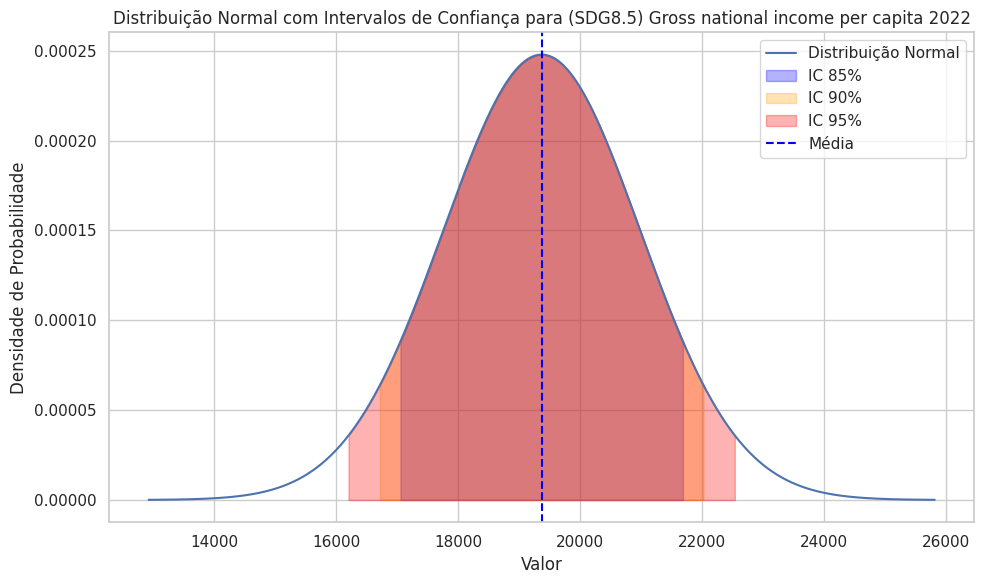

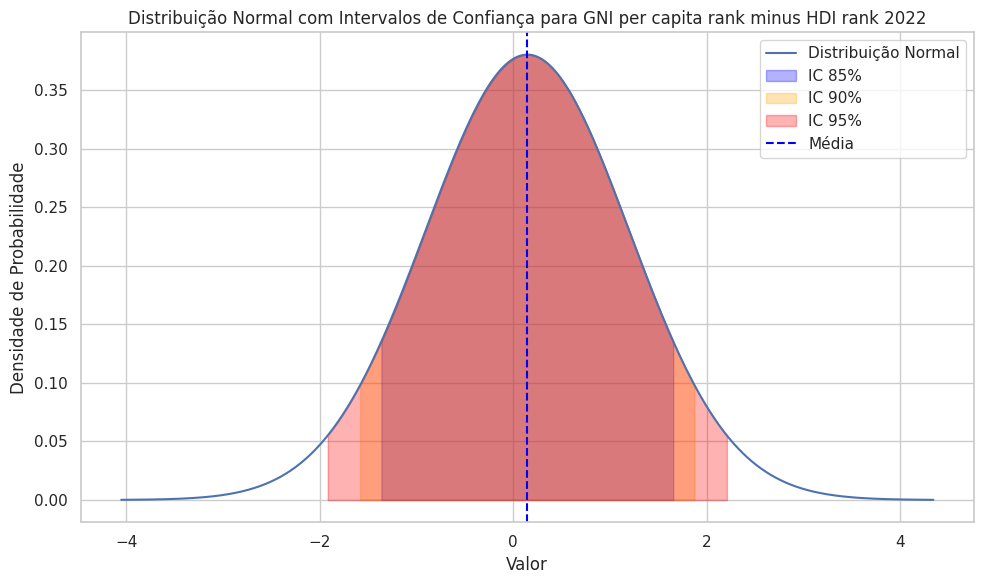

In [26]:
# Filtrar apenas as colunas numéricas
numeric_columns = hdi.select_dtypes(include=['float64', 'int64'])

# Calcular e plotar intervalos de confiança para cada coluna numérica
for column in numeric_columns.columns:
    # Garantir que os valores são numéricos
    hdi[column] = pd.to_numeric(hdi[column], errors='coerce')

    # Remover valores NaN
    dados_limpos = hdi[column].dropna()

    # Calculando média e erro padrão da média
    media = np.mean(dados_limpos)
    sem = stats.sem(dados_limpos)  # Erro padrão da média

    # Calculando intervalos de confiança
    ic_85 = stats.t.interval(0.85, len(dados_limpos)-1, loc=media, scale=sem)
    ic_90 = stats.t.interval(0.90, len(dados_limpos)-1, loc=media, scale=sem)
    ic_95 = stats.t.interval(0.95, len(dados_limpos)-1, loc=media, scale=sem)

    # Plotar a distribuição normal com intervalos de confiança
    plt.figure(figsize=(10, 6))
    x = np.linspace(media - 4*sem, media + 4*sem, 1000)
    y = stats.norm.pdf(x, media, sem)

    plt.plot(x, y, label='Distribuição Normal')
    plt.fill_between(x, 0, y, where=(x >= ic_85[0]) & (x <= ic_85[1]), color='blue', alpha=0.3, label='IC 85%')
    plt.fill_between(x, 0, y, where=(x >= ic_90[0]) & (x <= ic_90[1]), color='orange', alpha=0.3, label='IC 90%')
    plt.fill_between(x, 0, y, where=(x >= ic_95[0]) & (x <= ic_95[1]), color='red', alpha=0.3, label='IC 95%')

    plt.axvline(media, color='blue', linestyle='--', label='Média')

    plt.title(f'Distribuição Normal com Intervalos de Confiança para {column}')
    plt.xlabel('Valor')
    plt.ylabel('Densidade de Probabilidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

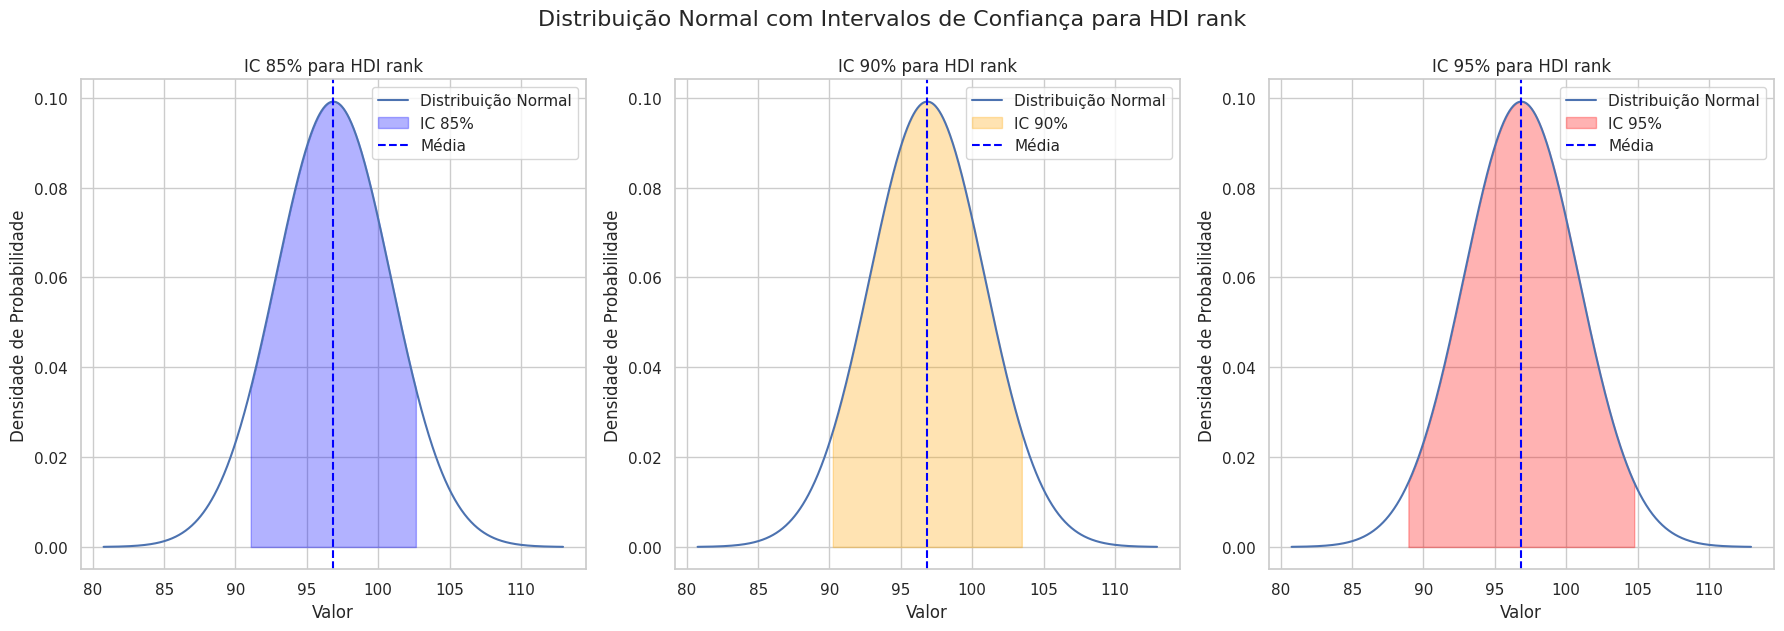

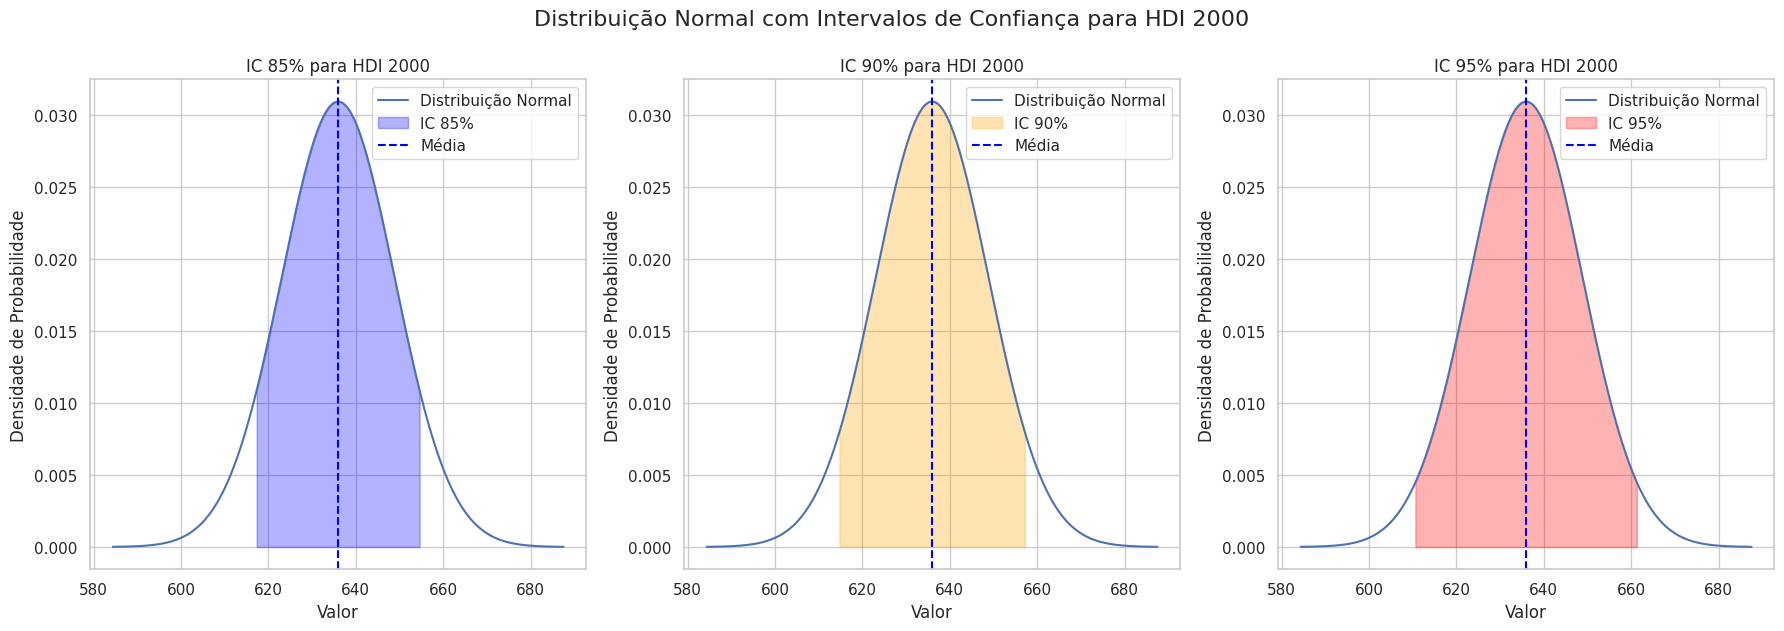

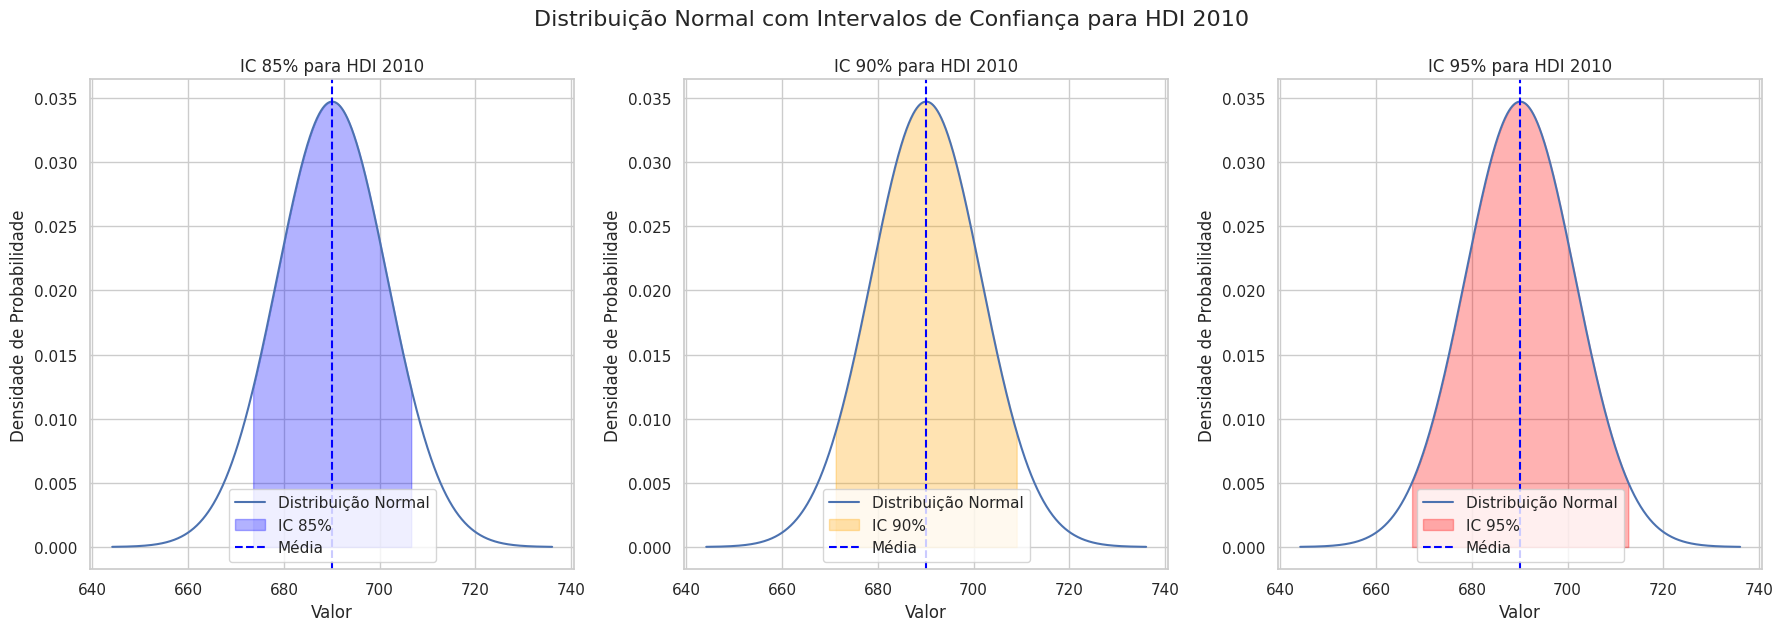

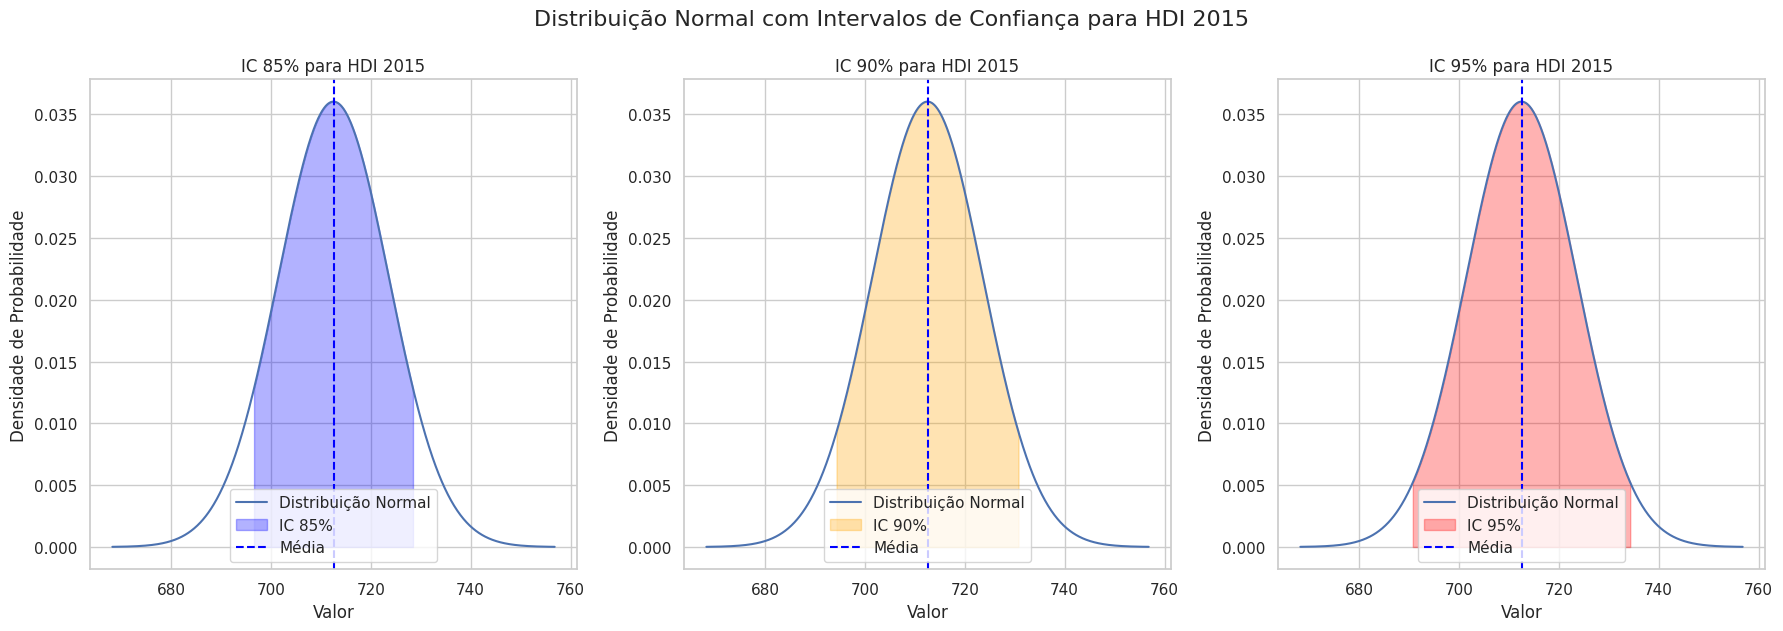

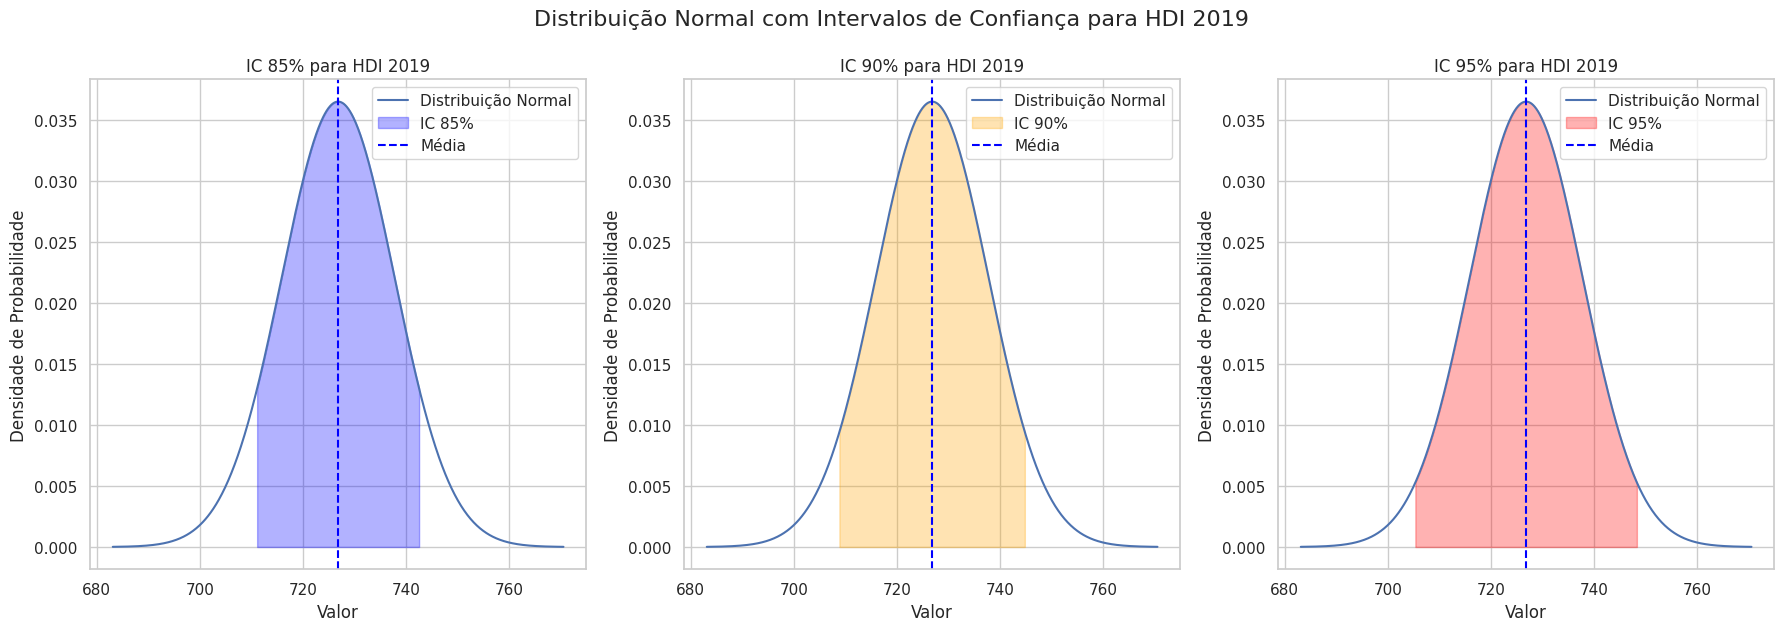

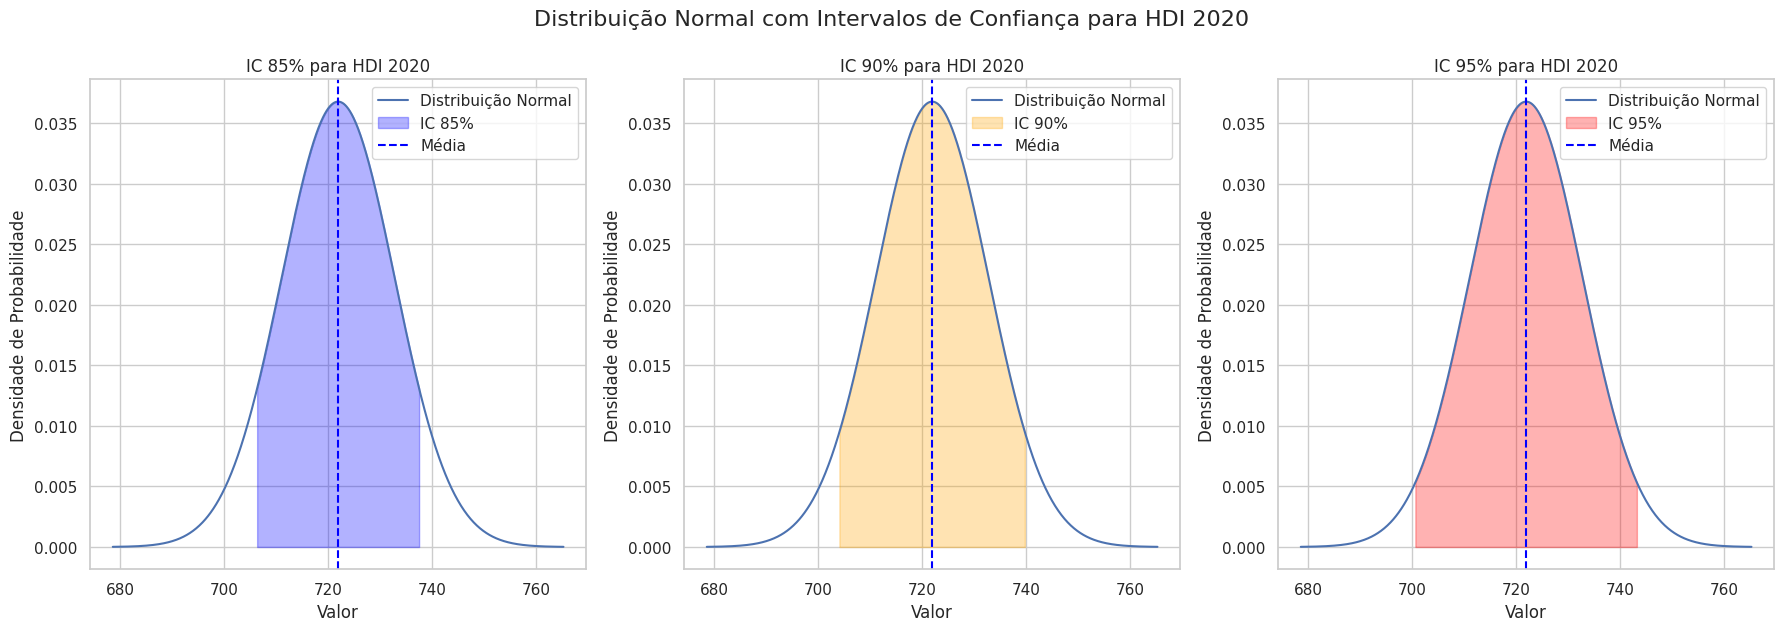

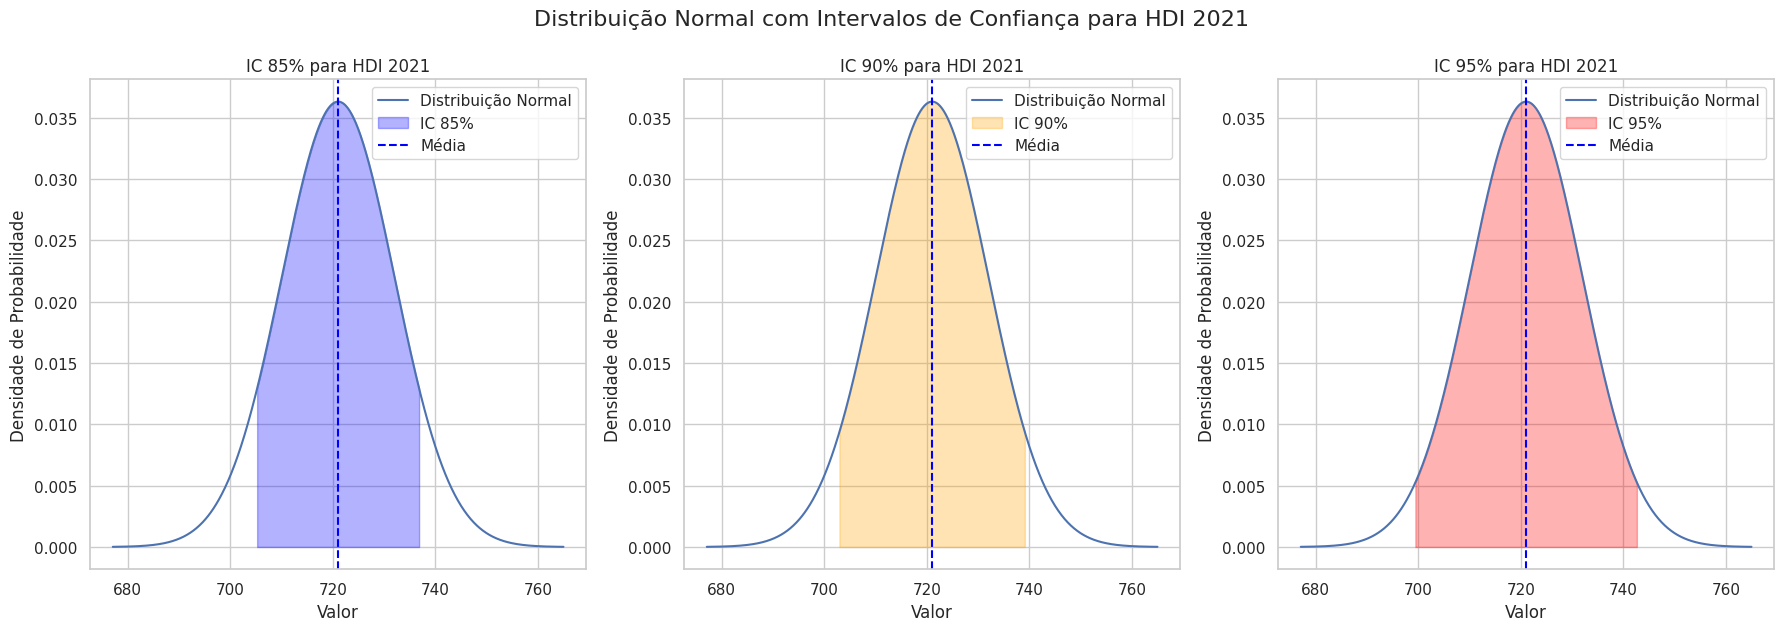

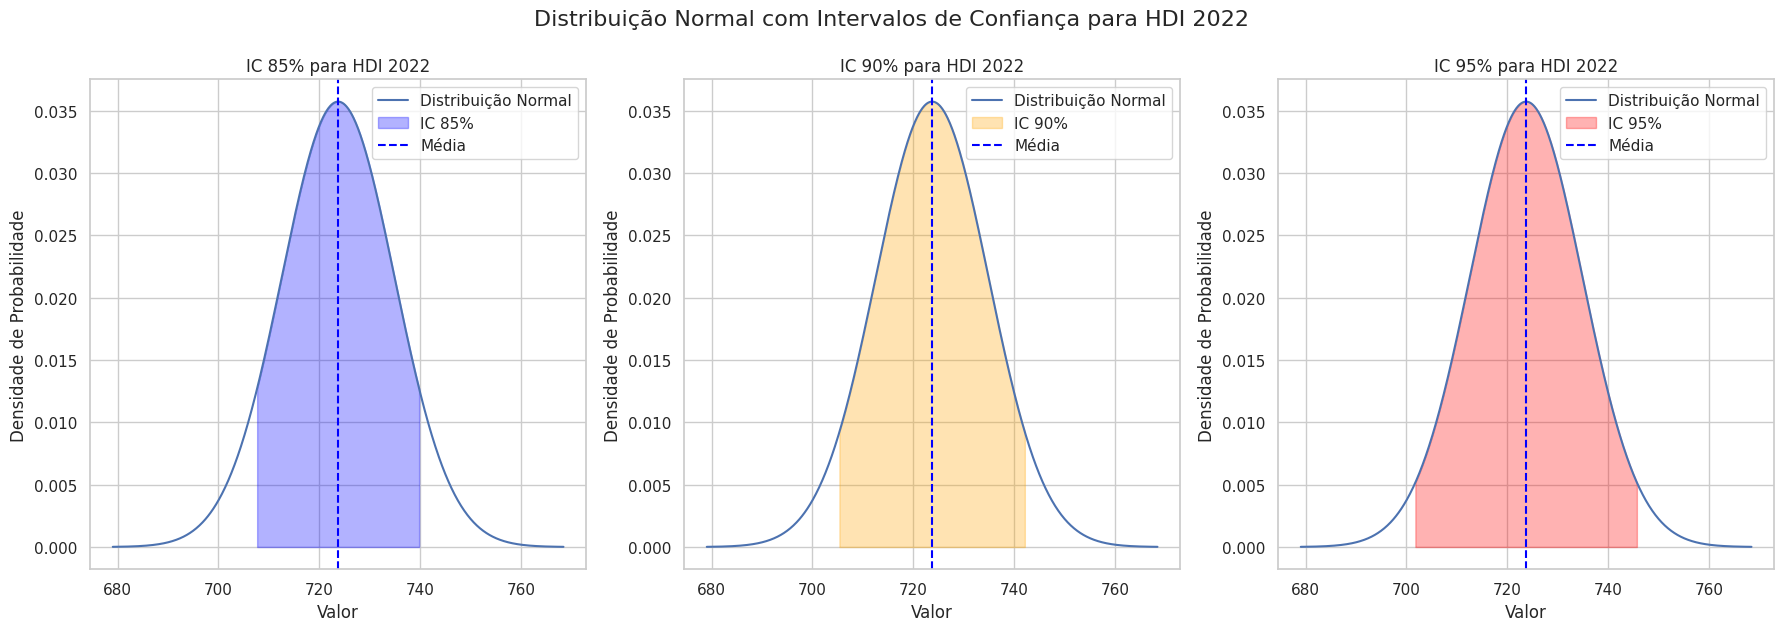

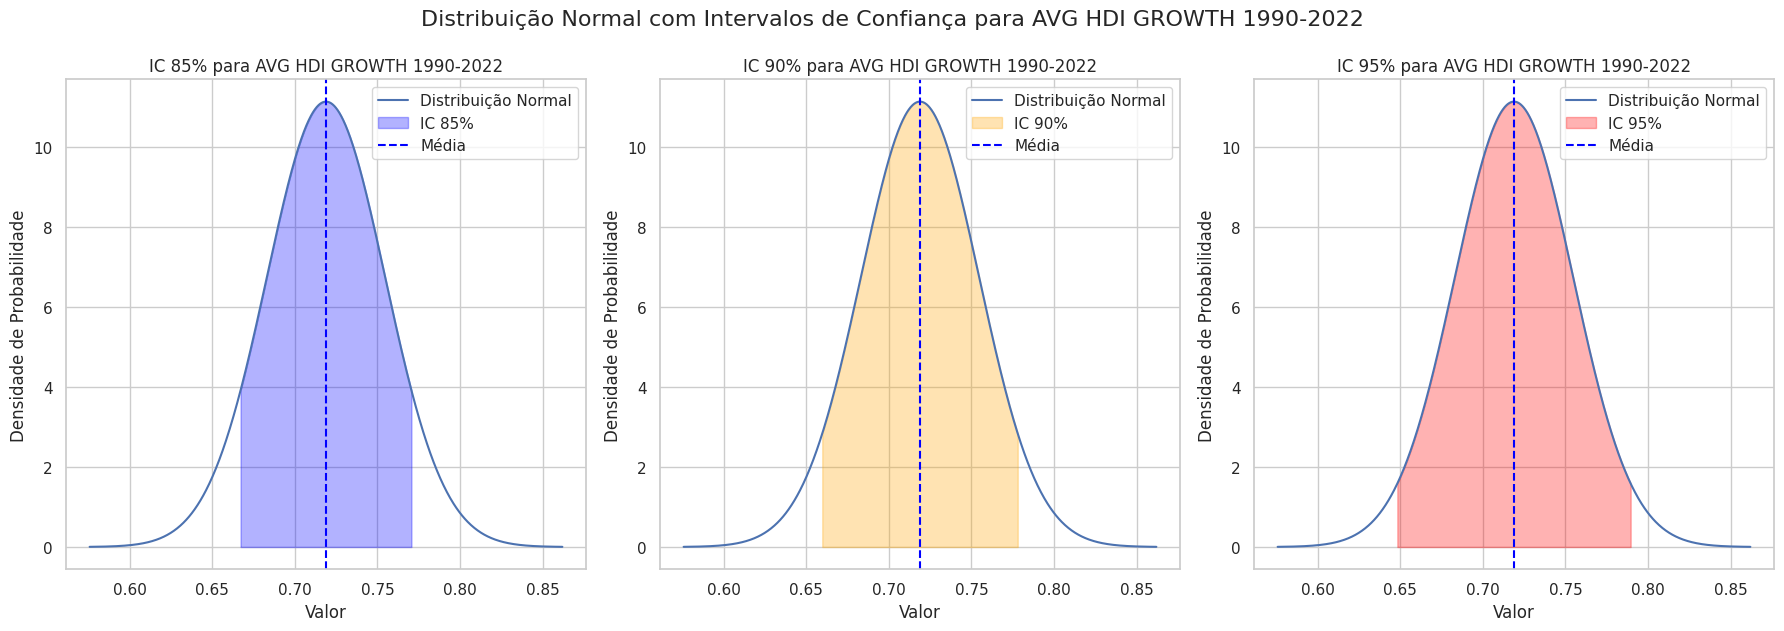

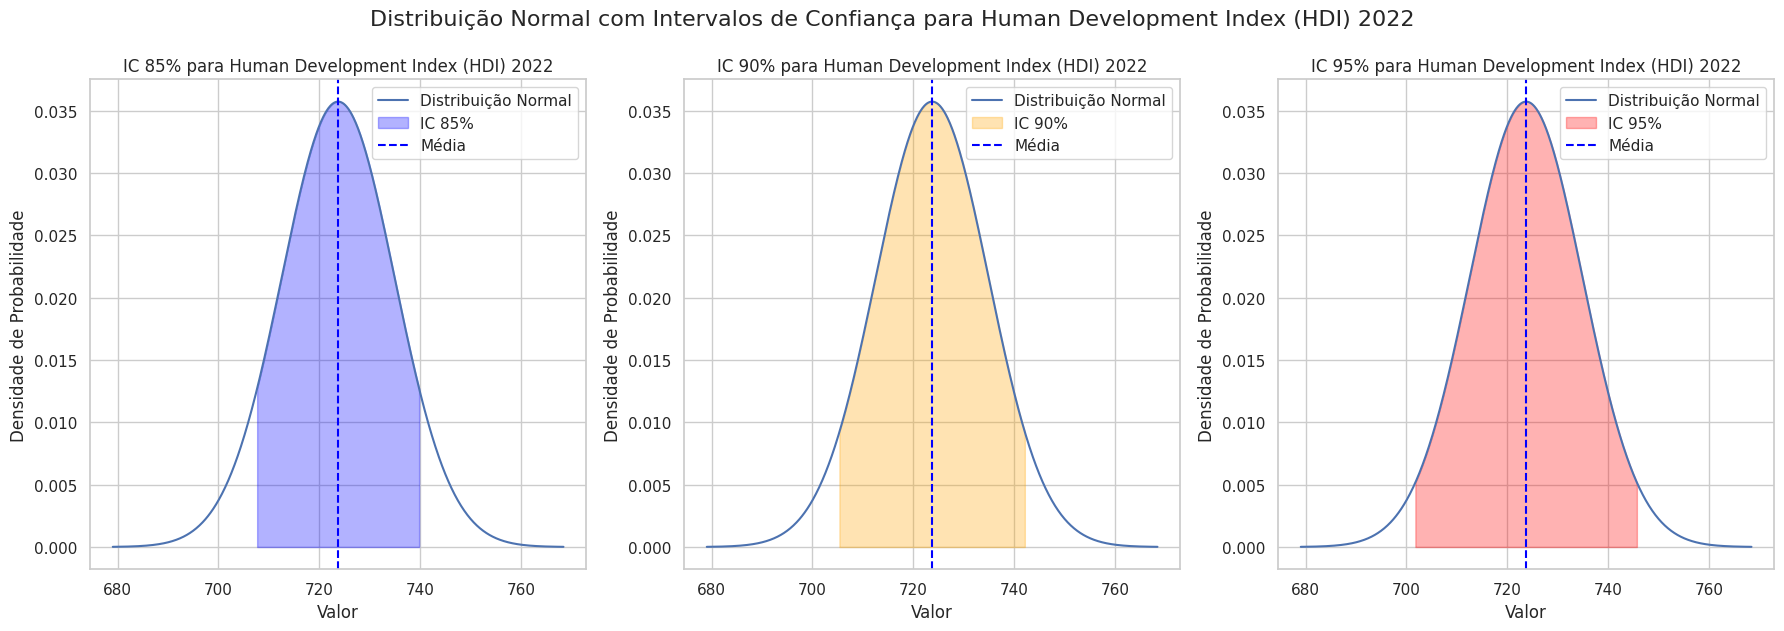

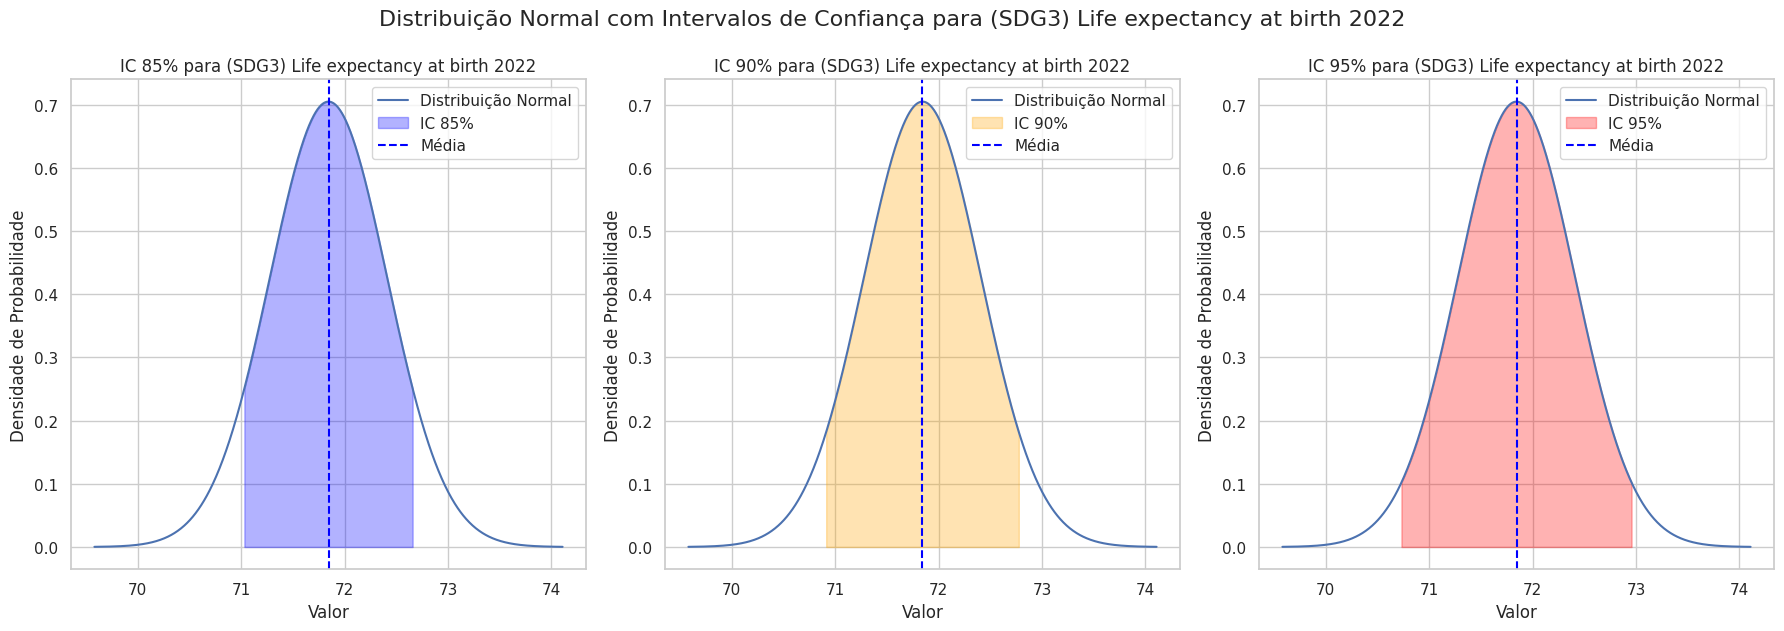

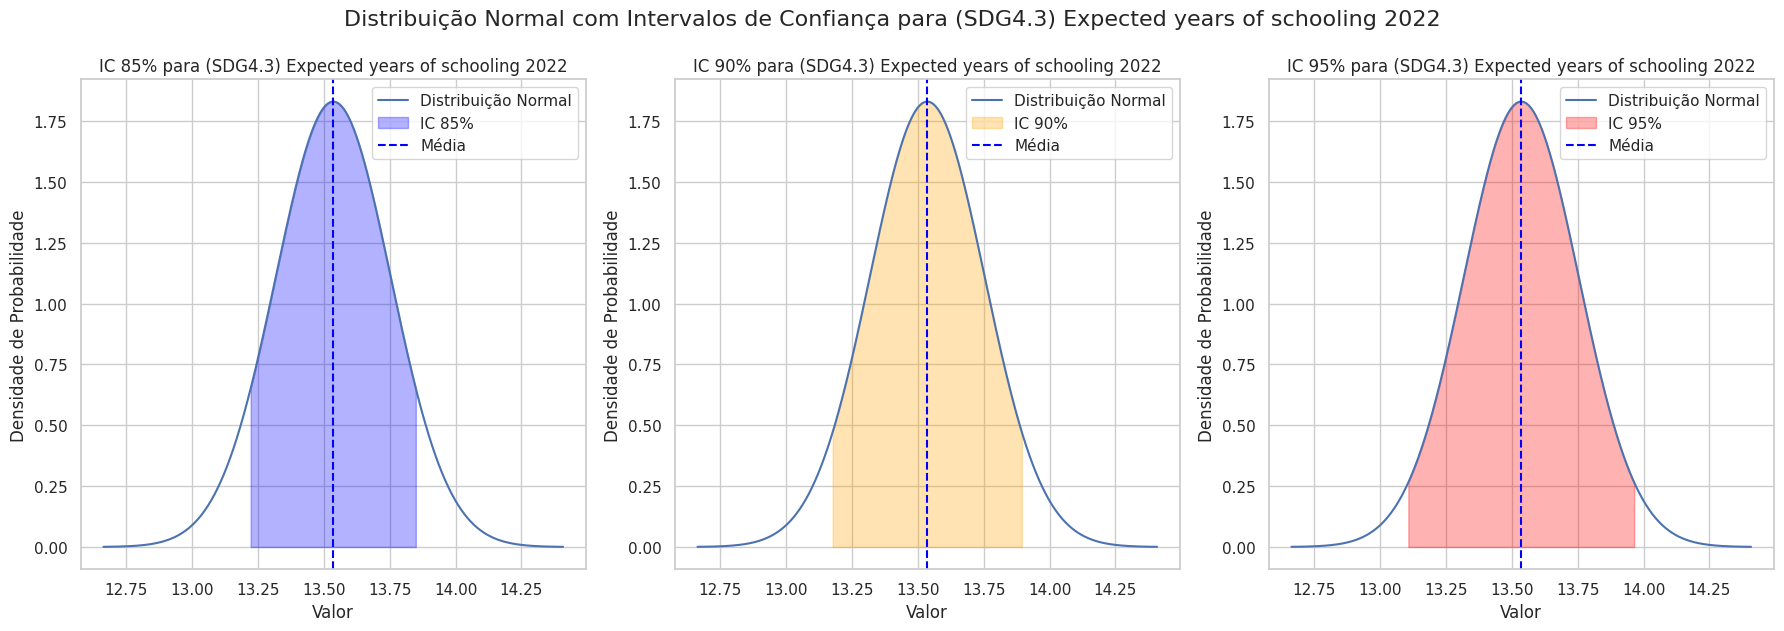

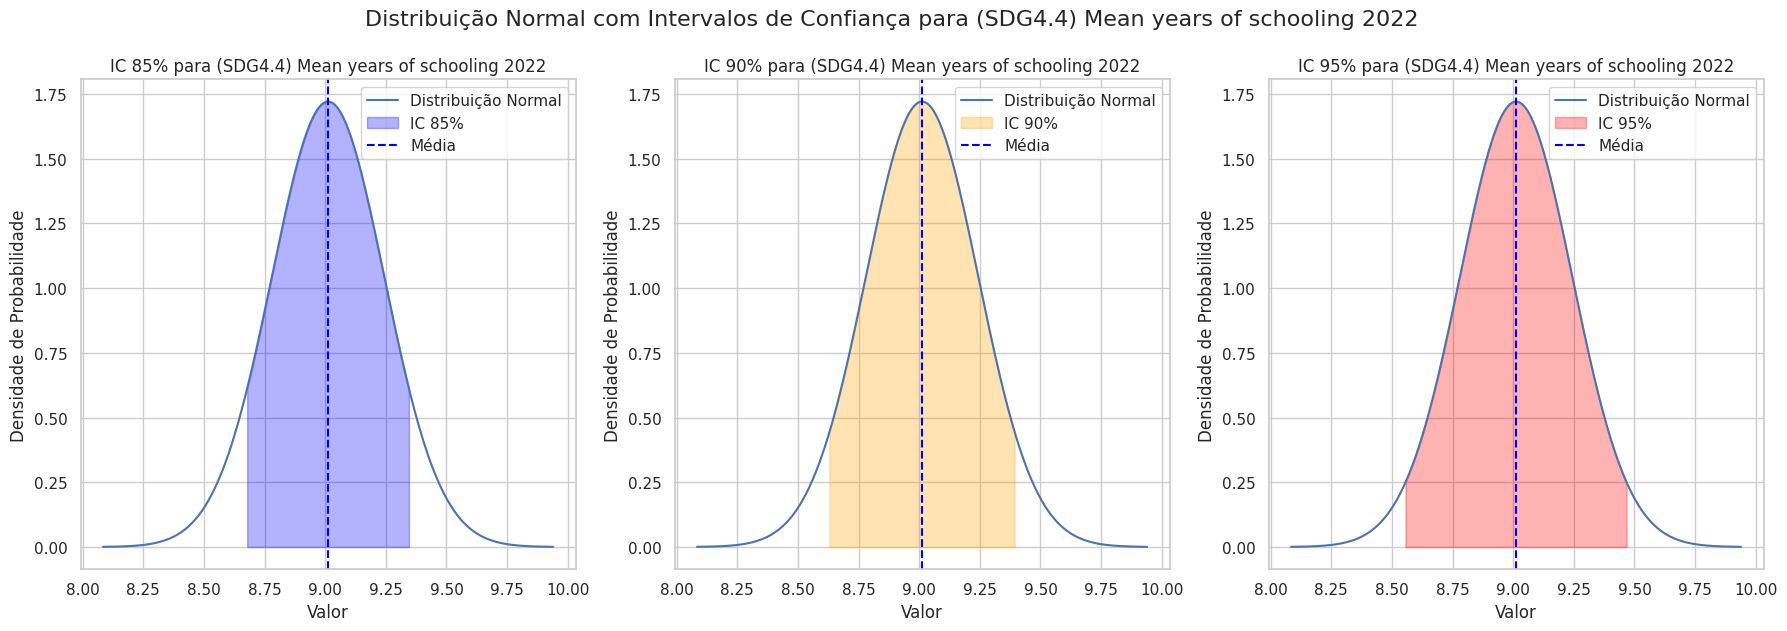

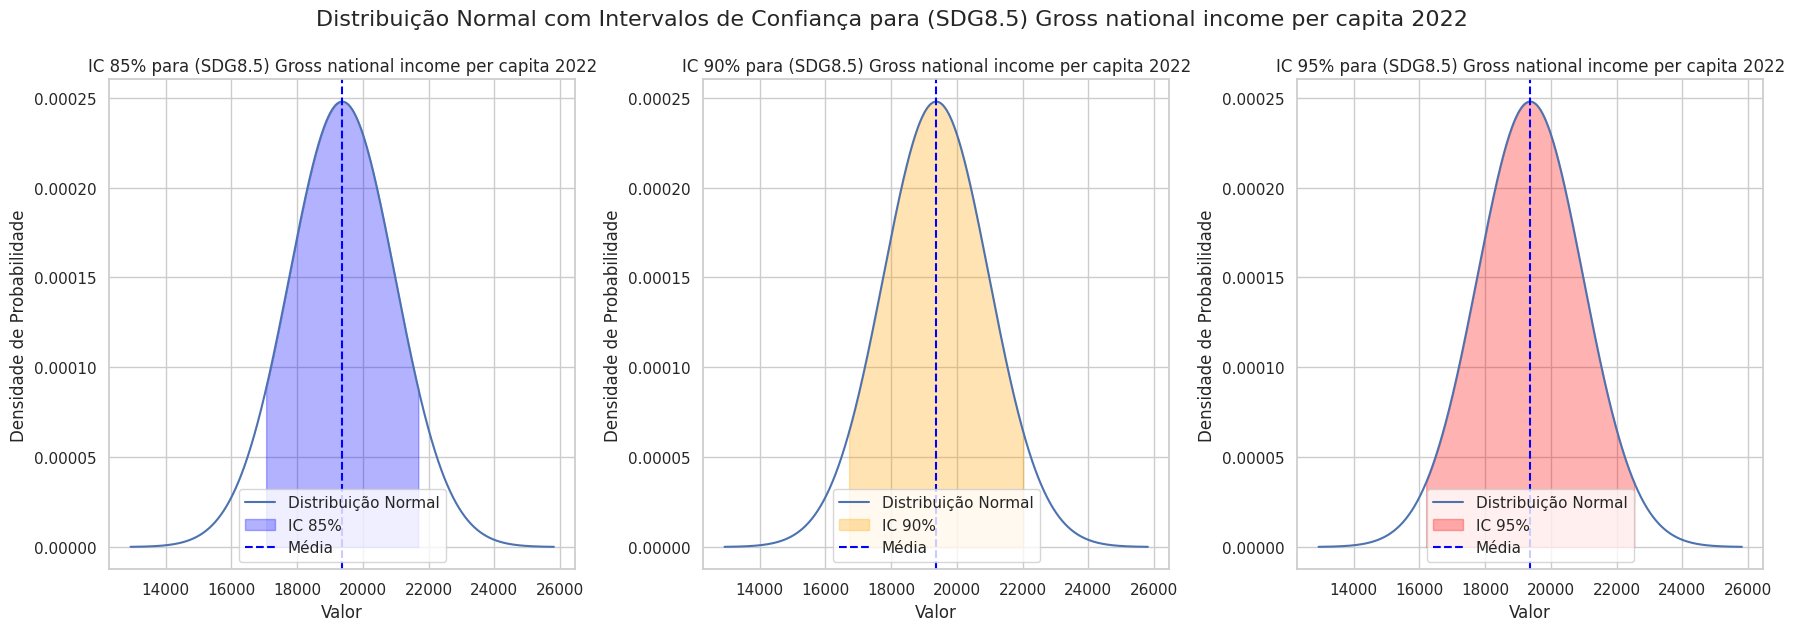

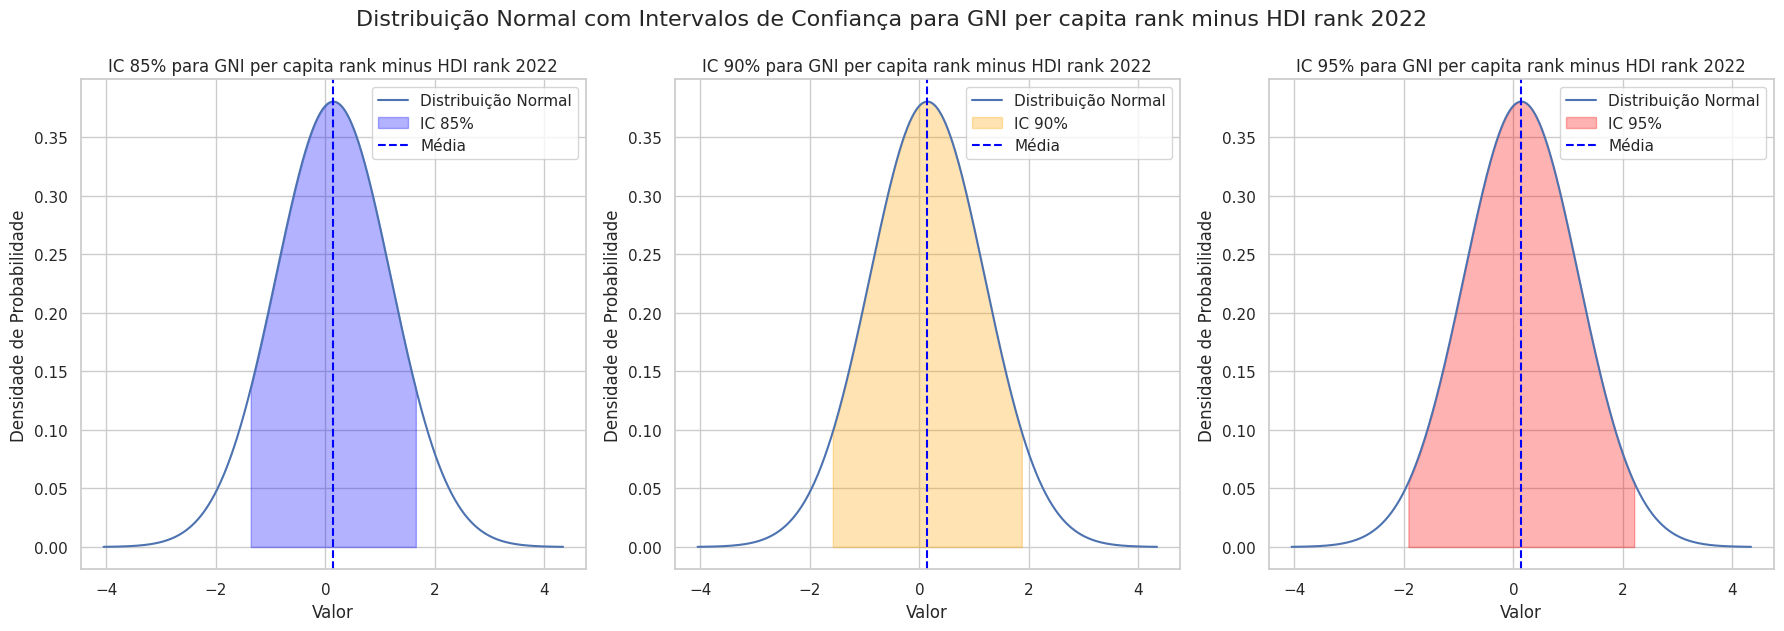

In [27]:
# Filtrar apenas as colunas numéricas
numeric_columns = hdi.select_dtypes(include=['float64', 'int64'])

# Calcular e plotar intervalos de confiança para cada coluna numérica
for column in numeric_columns.columns:
    # Garantir que os valores são numéricos
    hdi[column] = pd.to_numeric(hdi[column], errors='coerce')

    # Remover valores NaN
    dados_limpos = hdi[column].dropna()

    # Calculando média e erro padrão da média
    media = np.mean(dados_limpos)
    sem = stats.sem(dados_limpos)  # Erro padrão da média

    # Calculando intervalos de confiança
    ic_85 = stats.t.interval(0.85, len(dados_limpos)-1, loc=media, scale=sem)
    ic_90 = stats.t.interval(0.90, len(dados_limpos)-1, loc=media, scale=sem)
    ic_95 = stats.t.interval(0.95, len(dados_limpos)-1, loc=media, scale=sem)

    # Plotar os gráficos em subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Dados para a distribuição normal
    x = np.linspace(media - 4*sem, media + 4*sem, 1000)
    y = stats.norm.pdf(x, media, sem)

    # Subplot para IC 85%
    axs[0].plot(x, y, label='Distribuição Normal')
    axs[0].fill_between(x, 0, y, where=(x >= ic_85[0]) & (x <= ic_85[1]), color='blue', alpha=0.3, label='IC 85%')
    axs[0].axvline(media, color='blue', linestyle='--', label='Média')
    axs[0].set_title(f'IC 85% para {column}')
    axs[0].set_xlabel('Valor')
    axs[0].set_ylabel('Densidade de Probabilidade')
    axs[0].legend()
    axs[0].grid(True)

    # Subplot para IC 90%
    axs[1].plot(x, y, label='Distribuição Normal')
    axs[1].fill_between(x, 0, y, where=(x >= ic_90[0]) & (x <= ic_90[1]), color='orange', alpha=0.3, label='IC 90%')
    axs[1].axvline(media, color='blue', linestyle='--', label='Média')
    axs[1].set_title(f'IC 90% para {column}')
    axs[1].set_xlabel('Valor')
    axs[1].set_ylabel('Densidade de Probabilidade')
    axs[1].legend()
    axs[1].grid(True)

    # Subplot para IC 95%
    axs[2].plot(x, y, label='Distribuição Normal')
    axs[2].fill_between(x, 0, y, where=(x >= ic_95[0]) & (x <= ic_95[1]), color='red', alpha=0.3, label='IC 95%')
    axs[2].axvline(media, color='blue', linestyle='--', label='Média')
    axs[2].set_title(f'IC 95% para {column}')
    axs[2].set_xlabel('Valor')
    axs[2].set_ylabel('Densidade de Probabilidade')
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout()
    plt.suptitle(f'Distribuição Normal com Intervalos de Confiança para {column}', fontsize=16, y=1.05)
    plt.show()

# Extra: Análises aprofundadas

## Criação de coluna Continente

In [28]:
# Criaçãod e Coluna de Continente
continent_mapping = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo (Democratic Republic of the)': 'Africa',
    'Congo': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hong Kong, China (SAR)': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Lao People\'s Democratic Republic': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Micronesia (Federated States of)': 'Oceania',
    'Moldova (Republic of)': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Republic of Korea': 'Asia',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Türkiye': 'Asia',
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela (Bolivarian Republic of)': 'South America',
    'Viet Nam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

hdi['Continent'] = hdi['Country'].map(continent_mapping)

In [29]:
# Visualização do DataSet após criação
hdi

HDI rank                   Country HDI 1990  HDI 2000  HDI 2010  \
0           1               Switzerland      850     885.0     940.0   
1           2                    Norway      845     914.0     938.0   
2           3                   Iceland      834     895.0     927.0   
3           4    Hong Kong, China (SAR)      739     831.0     914.0   
4           5                   Denmark      839     890.0     913.0   
..        ...                       ...      ...       ...       ...   
188       189                      Chad      NaN     292.0     364.0   
189       189                     Niger      212     260.0     336.0   
190       191  Central African Republic      333     319.0     357.0   
191       192               South Sudan      NaN       NaN     406.0   
192       193                   Somalia      NaN       NaN       NaN   

     HDI 2015  HDI 2019  HDI 2020  HDI 2021  HDI 2022  ...  \
0       952.0     960.0     957.0     965.0       967  ...   
1       952.0     961.0     963.0     964.0       966  ...   
2       948.0     958.0     955.0     957.0       959  ...   
3       936.0     953.0     955.0     959.0       956  ...   
4       936.0     946.0     946.0     947.0       952  ...   
..        ...       ...       ...       ...       ...  ...   
188     388.0     398.0     396.0     393.0       394  ...   
189     367.0     390.0     391.0     389.0       394  ...   
190     367.0     391.0     389.0     387.0       387  ...   
191     381.0     391.0     386.0     381.0       381  ...   
192       NaN       NaN       NaN       NaN       380  ...   

    AVG HDI GROWTH 2010-2022 AVG HDI GROWTH 1990-2022  \
0                       0.24                     0.40   
1                       0.25                     0.42   
2                       0.28                     0.44   
3                       0.38                     0.81   
4                       0.35                     0.40   
..                       ...                      ...   
188                     0.66                      NaN   
189                     1.34                     1.96   
190                     0.67                     0.47   
191                    -0.53                      NaN   
192                      NaN                      NaN   

    Human Development Index (HDI) 2022 (SDG3) Life expectancy at birth 2022  \
0                                  967                                 84.3   
1                                  966                                 83.4   
2                                  959                                 82.8   
3                                  956                                 84.3   
4                                  952                                 81.9   
..                                 ...                                  ...   
188                                394                                 53.0   
189                                394                                 62.1   
190                                387                                 54.5   
191                                381                                 55.6   
192                                380                                 56.1   

     (SDG4.3) Expected years of schooling 2022  \
0                                         16.6   
1                                         18.6   
2                                         19.1   
3                                         17.8   
4                                         18.8   
..                                         ...   
188                                        8.2   
189                                        7.2   
190                                        7.3   
191                                        5.6   
192                                        7.6   

     (SDG4.4) Mean years of schooling 2022  \
0                                     13.9   
1                                     13.1   
2                     

## Correlação entre SDG e HDI

### Análise por Continente

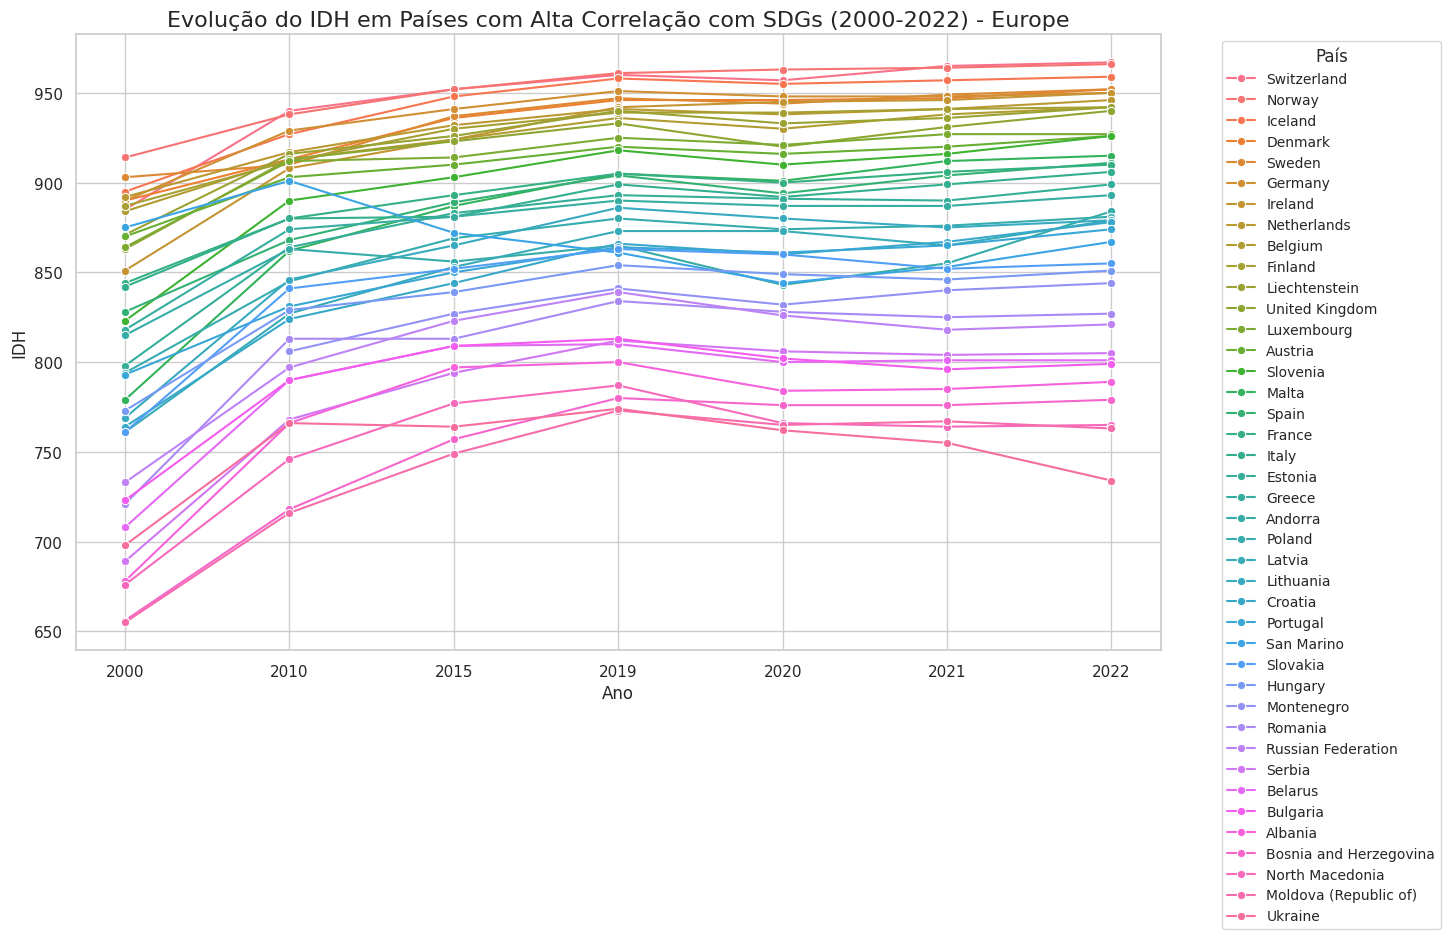

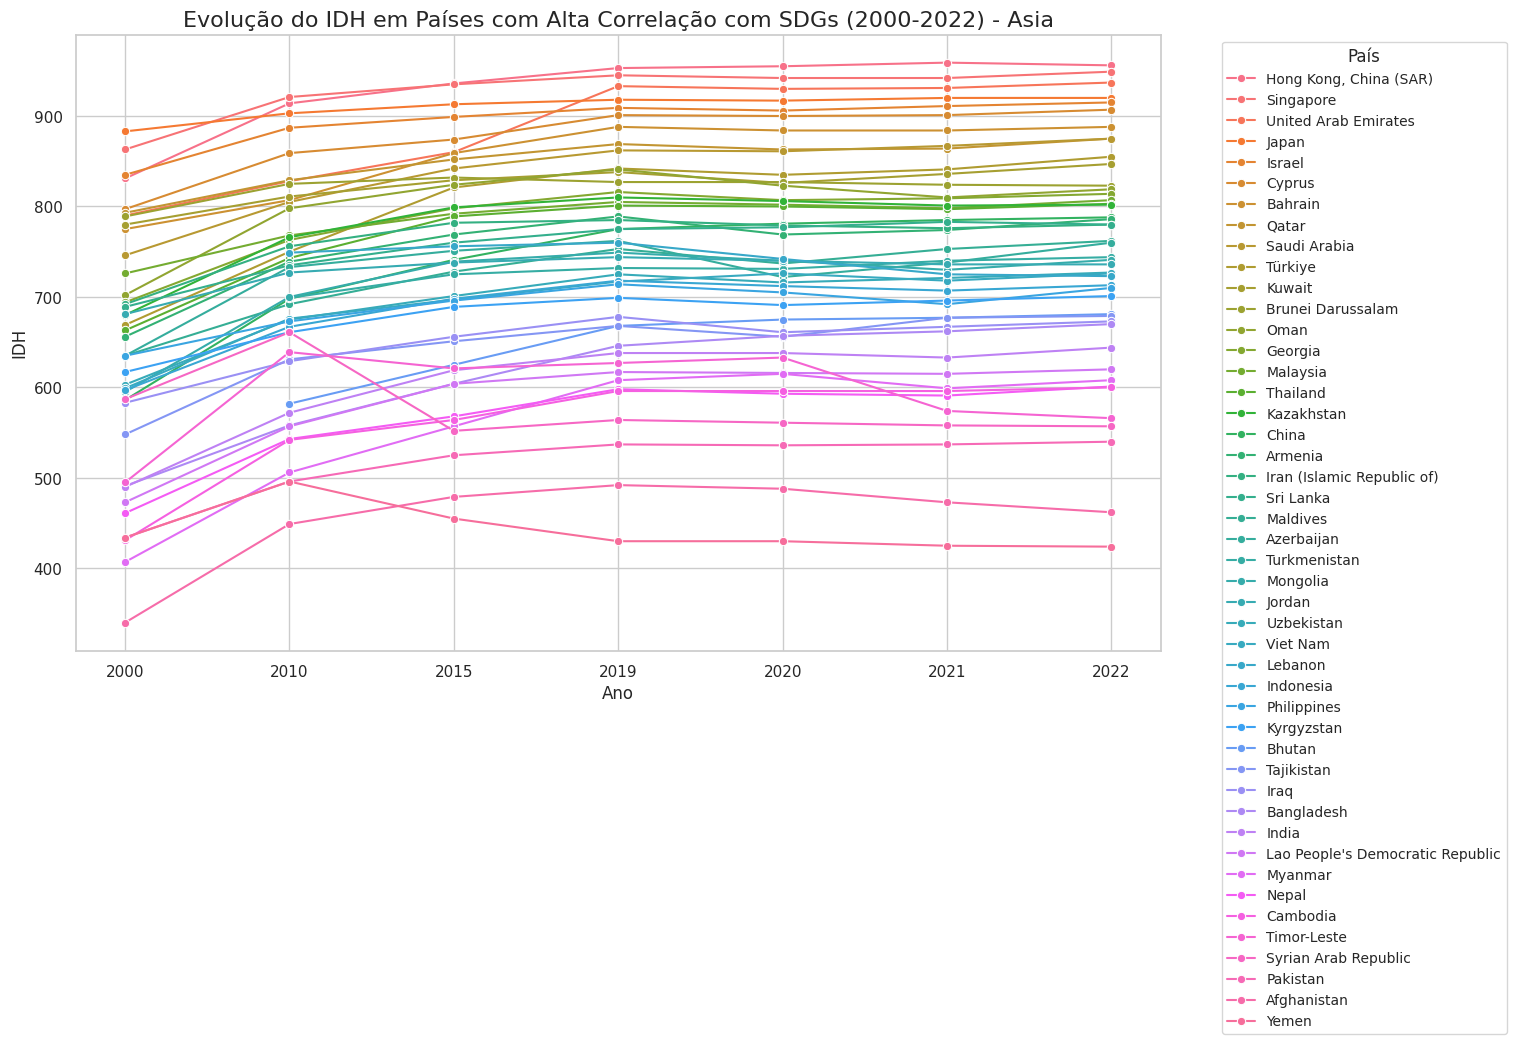

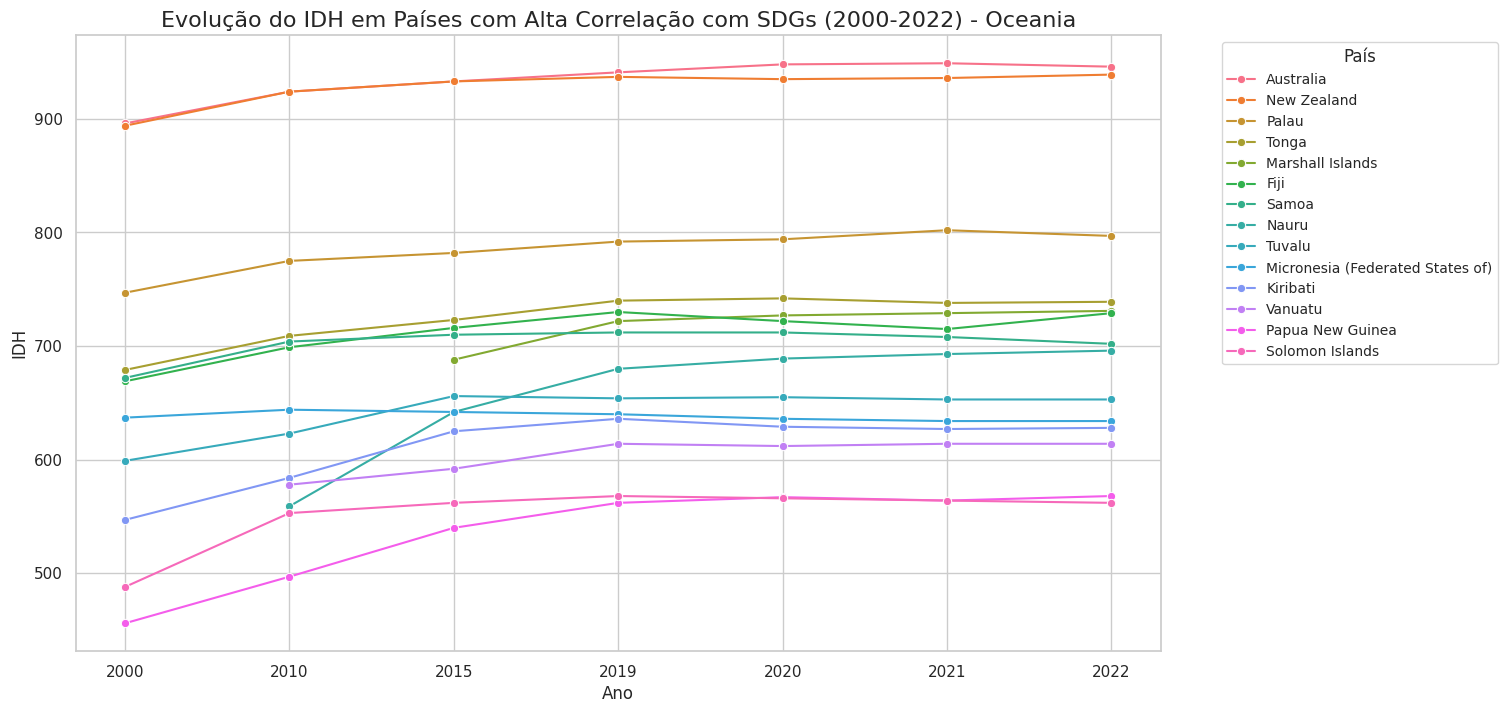

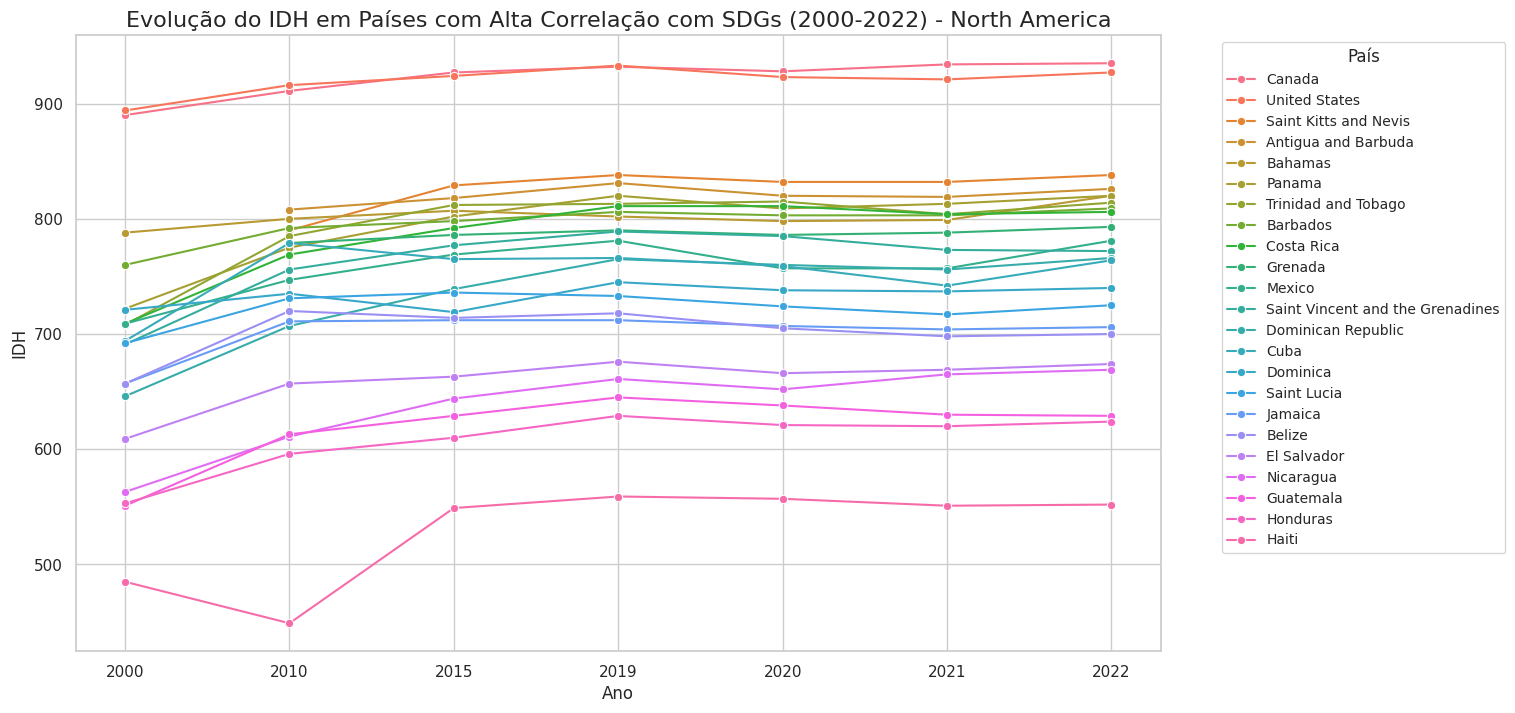

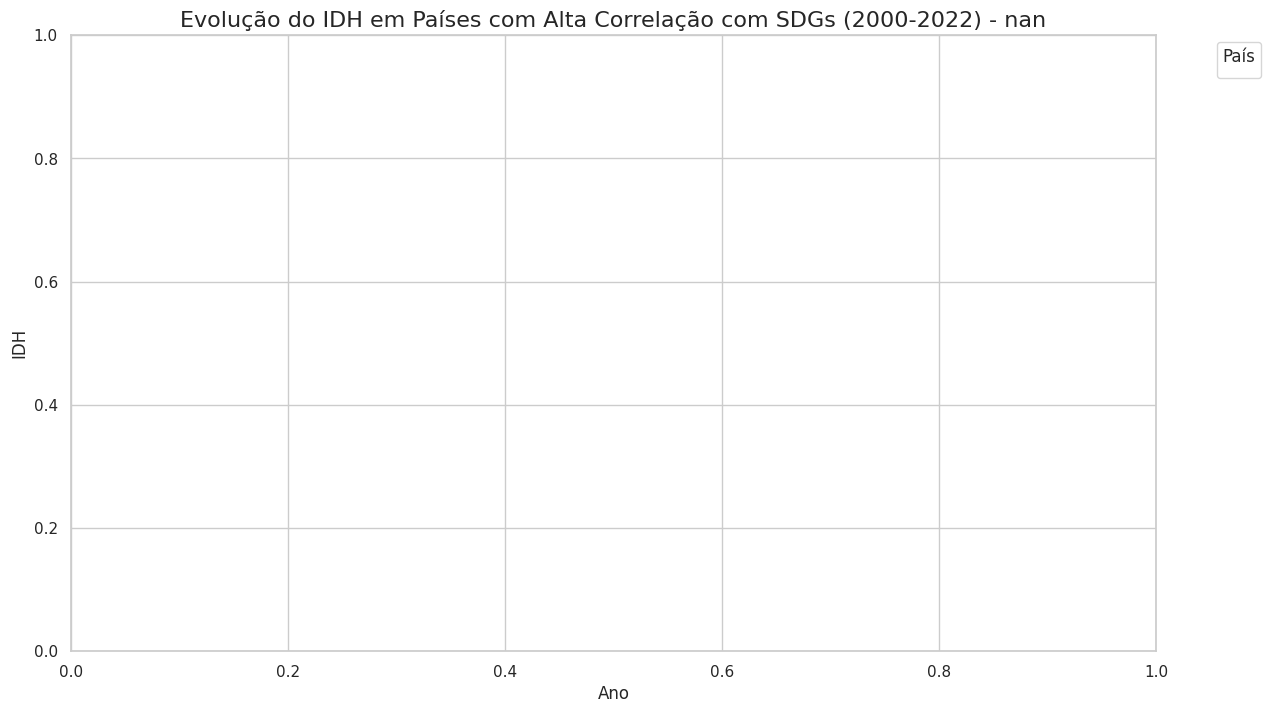

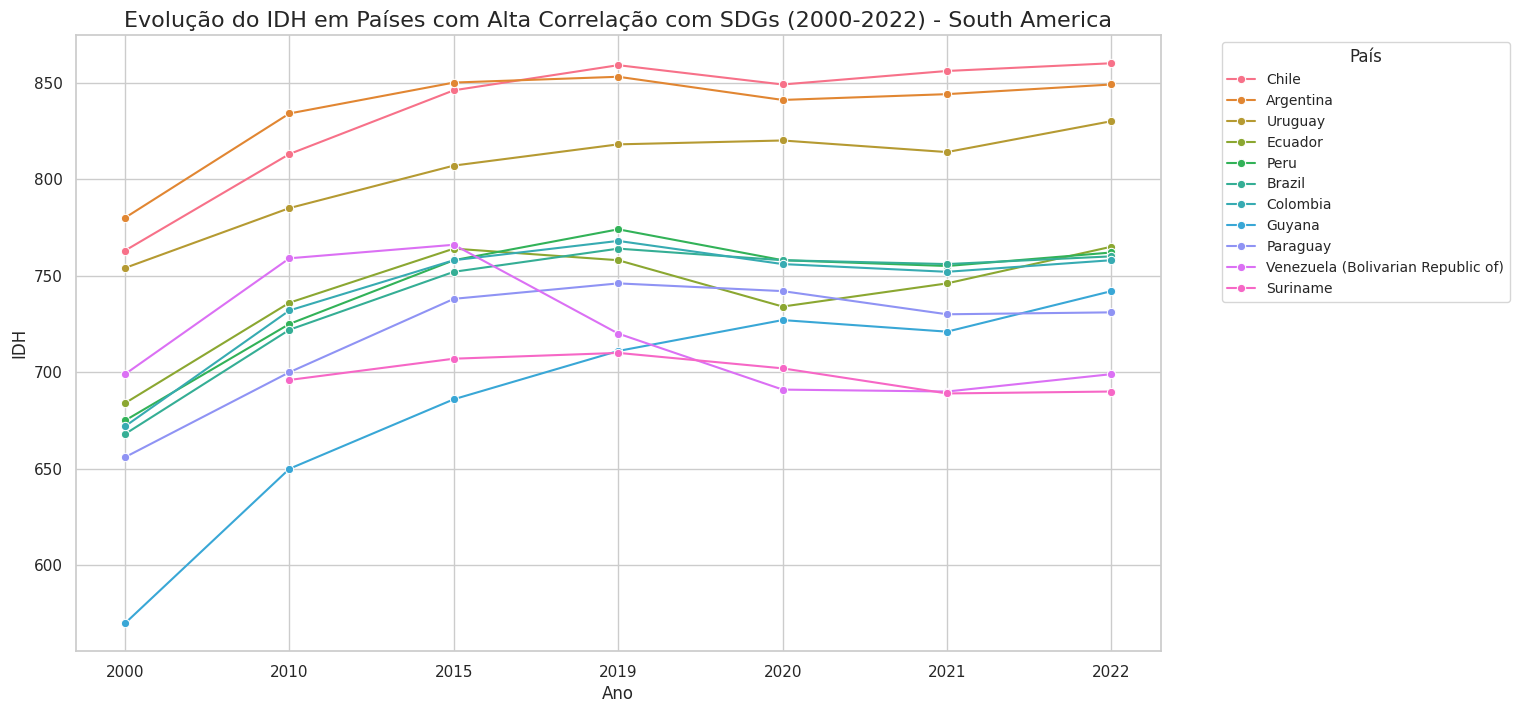

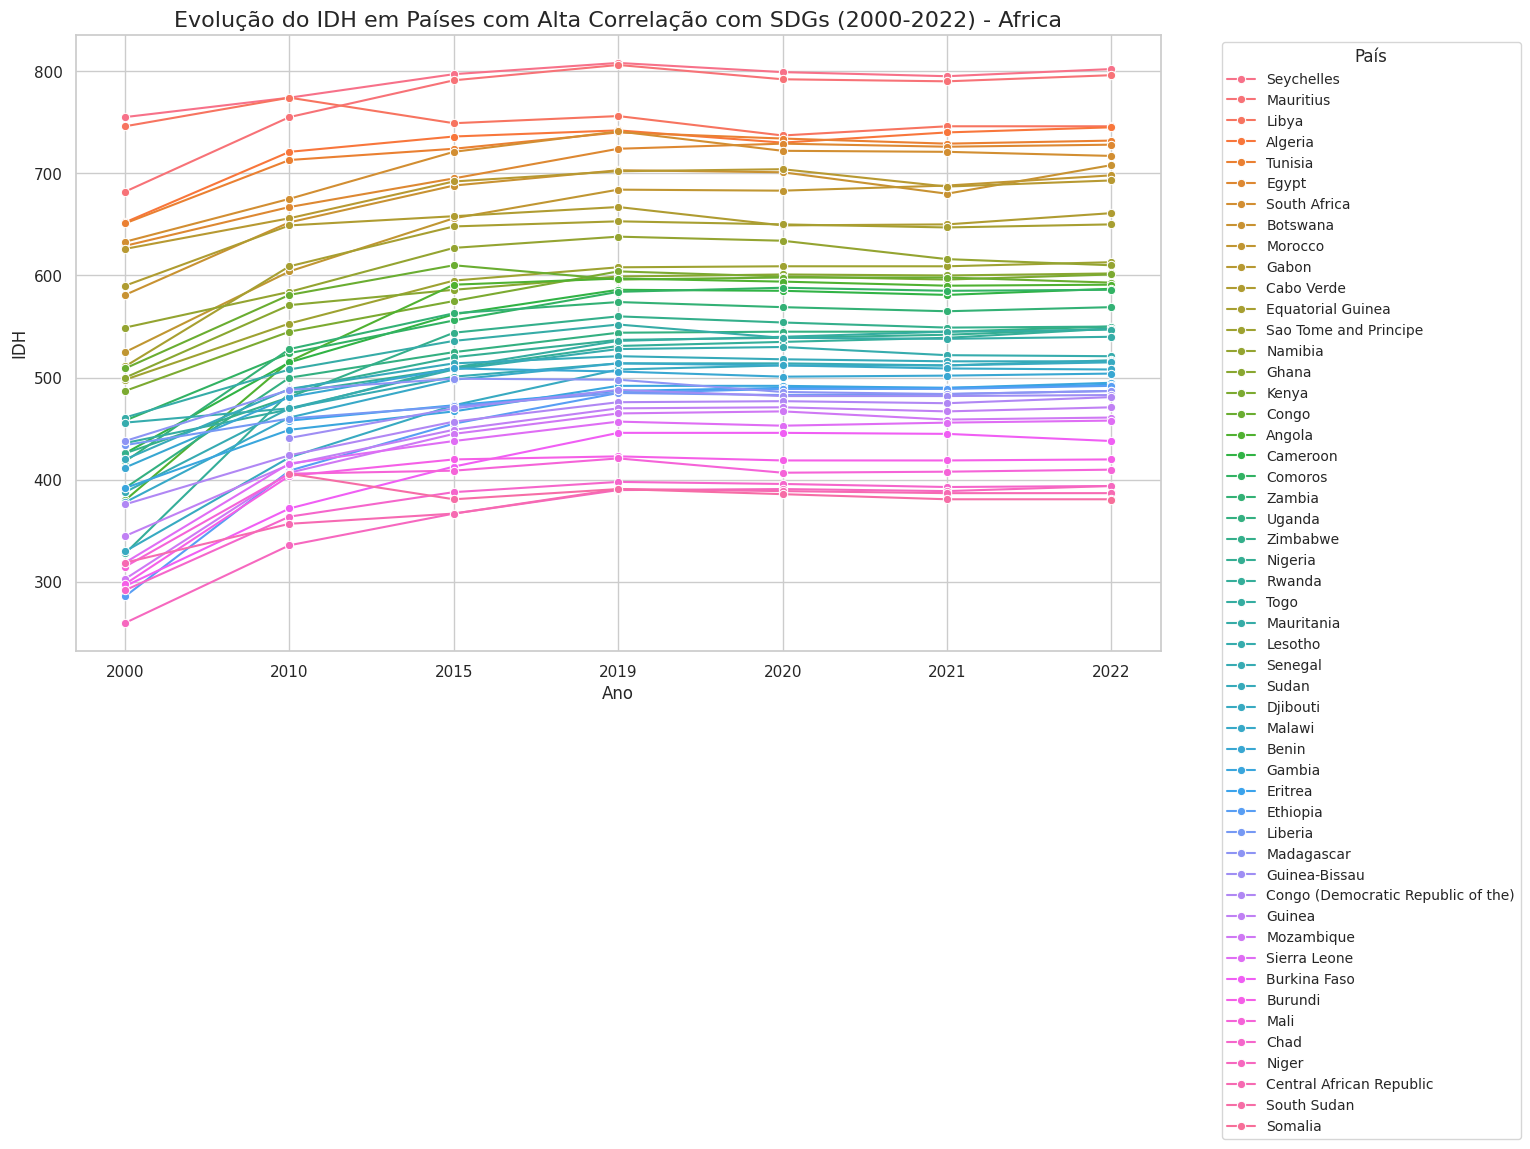

In [30]:
# Selecionar as colunas de interesse (anos e SDGs)
years = ['HDI 2000', 'HDI 2010', 'HDI 2015', 'HDI 2019', 'HDI 2020', 'HDI 2021', 'HDI 2022']
sdg_columns = [
    '(SDG3) Life expectancy at birth 2022',
    '(SDG4.3) Expected years of schooling 2022',
    '(SDG4.4) Mean years of schooling 2022',
    '(SDG8.5) Gross national income per capita 2022'
]
selected_columns = years + sdg_columns

# Filtrar apenas as colunas de interesse
hdi_filtered = hdi[selected_columns]

# Calcular a matriz de correlação
correlation_matrix = hdi_filtered.corr()

# Filtrar correlações maiores que 0.8 com as colunas de SDG
correlated_columns = correlation_matrix[years].apply(lambda x: x > 0.8).any(axis=1)
correlated_columns = correlated_columns[correlated_columns].index.tolist()

# Filtrar o dataset para incluir apenas as colunas altamente correlacionadas
correlated_data = hdi[['Country', 'Continent'] + correlated_columns]

# Reformatar os dados para o formato longo (long format) para facilitar a plotagem
hdi_long = pd.melt(correlated_data, id_vars=['Country', 'Continent'], value_vars=years,
                   var_name='Year', value_name='HDI')

# Converter a coluna 'Year' para string para facilitar a plotagem
hdi_long['Year'] = hdi_long['Year'].str.extract(r'(\d{4})')[0]

# Plotar a evolução do IDH nos países com alta correlação, separados por continente
continents = hdi_long['Continent'].unique()

for continent in continents:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=hdi_long[hdi_long['Continent'] == continent], x='Year', y='HDI', hue='Country', marker='o')
    plt.title(f'Evolução do IDH em Países com Alta Correlação com SDGs (2000-2022) - {continent}', fontsize=16)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('IDH', fontsize=12)
    plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True)
    plt.show()

### Analisando países com maiores crescimentos após correlação

Top 10 países com maiores crescimentos no IDH (2000-2022):
+------------+--------+
|  Country   | Growth |
+------------+--------+
|   Rwanda   | 220.0  |
|   Angola   | 211.0  |
|  Ethiopia  | 206.0  |
|   China    | 202.0  |
|  Myanmar   | 201.0  |
|  Türkiye   | 186.0  |
|  Djibouti  | 185.0  |
| Bangladesh | 179.0  |
|  Morocco   | 173.0  |
|   Guyana   | 172.0  |
+------------+--------+


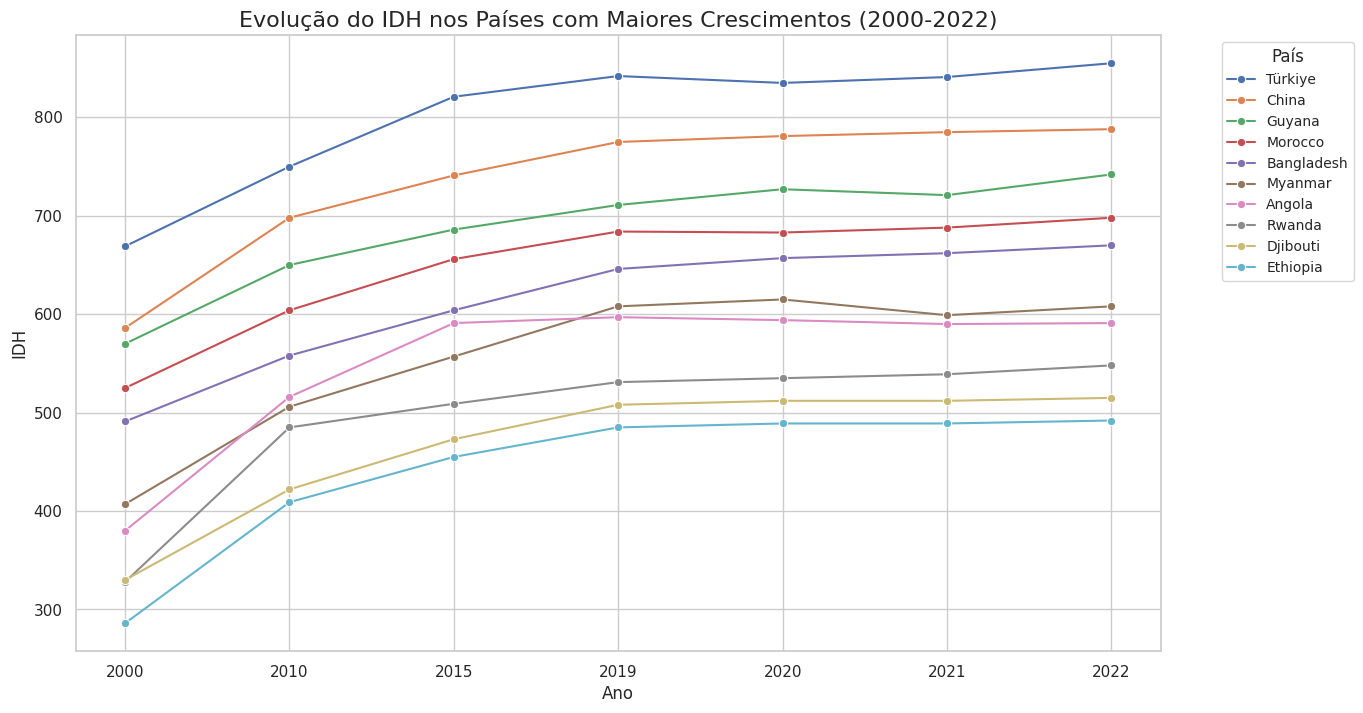

In [31]:
from tabulate import tabulate

# Selecionar as colunas de interesse (anos e SDGs)
years = ['HDI 2000', 'HDI 2010', 'HDI 2015', 'HDI 2019', 'HDI 2020', 'HDI 2021', 'HDI 2022']
sdg_columns = [
    '(SDG3) Life expectancy at birth 2022',
    '(SDG4.3) Expected years of schooling 2022',
    '(SDG4.4) Mean years of schooling 2022',
    '(SDG8.5) Gross national income per capita 2022'
]
selected_columns = years + sdg_columns

# Filtrar apenas as colunas de interesse
hdi_filtered = hdi[selected_columns]

# Calcular a matriz de correlação
correlation_matrix = hdi_filtered.corr()

# Filtrar correlações maiores que 0.8 com as colunas de SDG
correlated_columns = correlation_matrix[years].apply(lambda x: x > 0.8).any(axis=1)
correlated_columns = correlated_columns[correlated_columns].index.tolist()

# Filtrar o dataset para incluir apenas as colunas altamente correlacionadas
correlated_data = hdi[['Country', 'Continent'] + correlated_columns]

# Reformatar os dados para o formato longo (long format) para facilitar a plotagem
hdi_long = pd.melt(correlated_data, id_vars=['Country', 'Continent'], value_vars=years,
                   var_name='Year', value_name='HDI')

# Converter a coluna 'Year' para string para facilitar a plotagem
hdi_long['Year'] = hdi_long['Year'].str.extract(r'(\d{4})')[0]

# Identificar países com maiores crescimentos no IDH
growth_data = correlated_data.set_index('Country')[years]
growth_data['Growth'] = growth_data['HDI 2022'] - growth_data['HDI 2000']
top_growth_countries = growth_data.sort_values(by='Growth', ascending=False).head(10)

print("Top 10 países com maiores crescimentos no IDH (2000-2022):")
print(tabulate(top_growth_countries[['Growth']], headers='keys', tablefmt='pretty'))

# Analisar a evolução do IDH nos países com maiores crescimentos
plt.figure(figsize=(14, 8))
sns.lineplot(data=hdi_long[hdi_long['Country'].isin(top_growth_countries.index)], x='Year', y='HDI', hue='Country', marker='o')
plt.title('Evolução do IDH nos Países com Maiores Crescimentos (2000-2022)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('IDH', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.show()